<a href="https://colab.research.google.com/github/Yassin1-prog/EDA-Wildfires-Greece/blob/main/Greek_Wildfires_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Analysis of wildfires in Greece** 🌳🔥
###Exploratory Data Analysis (EDA) of Greek wildfire data from 2019-2024 to identify factors contributing to large fires.

#Initial Data Assesment



Φωρτώνουμε το σύνολο δεδομένων το οποίο έχει συλλεχθεί απο https://www.fireservice.gr/el/synola-dedomenon για τα έτη 2019-2024. (Η μετατροπή σε csv και το merge έχουν είδη γίνει)

In [92]:
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

df = pd.read_csv("wildfiresGR.csv", low_memory=False, na_values=['Not Found'])
df.drop(index=21206, inplace=True) # most of the vechiles are null there

Ακολουθεί περιγραφική στατιστική του σύνολο δεδομένων για να έχουμε καλύτερη εικόνα των δεδομένων.

In [93]:
df.shape

(58702, 38)

In [94]:
df.tail()

Α/Α ΕΓΓΡΑΦΗΣ  Α/Α ENGAGE   X-ENGAGE   Y-ENGAGE       Υπηρεσία  \
58698     2018123.0   1227154.0  20.878877  37.745634  Π.Υ. ΖΑΚΥΝΘΟΥ   
58699     2023999.0   1232674.0  20.776636  37.750583  Π.Υ. ΖΑΚΥΝΘΟΥ   
58700     2034292.0   1242147.0  20.883848  37.808427  Π.Υ. ΖΑΚΥΝΘΟΥ   
58701     1952074.0   1146350.0  20.651565  37.868703   Π.Κ. ΕΛΑΤΙΩΝ   
58702     1952227.0   1149275.0  20.653435  37.815964   Π.Κ. ΕΛΑΤΙΩΝ   

          Νομός Ημερ/νία Έναρξης Ώρα Έναρξης Ημερ/νία Κατασβεσης  \
58698  ΖΑΚΥΝΘΟΥ       10/07/2024       13:08          10/07/2024   
58699  ΖΑΚΥΝΘΟΥ       10/26/2024       20:18          10/27/2024   
58700  ΖΑΚΥΝΘΟΥ       11/02/2024       12:25          11/25/2024   
58701  ΖΑΚΥΝΘΟΥ       02/01/2024       20:15          02/01/2024   
58702  ΖΑΚΥΝΘΟΥ       02/10/2024       18:57          02/14/2024   

      Ώρα Κατάσβεσης Δασαρχείο        Δήμος      Περιοχή          Διεύθυνση  \
58698          14:25       NaN  Δ. ΖΑΚΥΝΘΟΥ          NaN    Τ.Κ.ΑΜΠΕΛΟΚΗΠΩΝ   
58699          19:37       NaN  Δ. ΖΑΚΥΝΘΟΥ          NaN   Τ.Κ. ΚΟΙΛΙΩΜΕΝΟΥ   
58700          13:49       NaN  Δ. ΖΑΚΥΝΘΟΥ          NaN           ΑΚΡΩΤΗΡΙ   
58701          21:06       NaN  Δ. ΖΑΚΥΝΘΟΥ  ΑΝΩ ΒΟΛΙΜΕΣ       Τ.Κ. ΒΟΛΙΜΩΝ   
58702          08:19       NaN  Δ. ΖΑΚΥΝΘΟΥ     ΕΞΩ ΧΩΡΑ  ΕΞΩ ΧΩΡΑ (ΛΑΚΚΟΣ)   

       Δάση  Δασική Έκταση  Άλση  Χορτ/κές Εκτάσεις  Καλάμια - Βάλτοι  \
58698  0.00            0.0   0.0               0.00              0.03   
58699  0.00            0.5   0.0               0.00              0.00   
58700  0.00            0.0   0.0               0.01              0.00   
58701  0.02            0.0   0.0               0.00              0.00   
58702  0.00          170.0   0.0               0.00              0.00   

       Γεωργικές Εκτάσεις  Υπολλείματα Καλλιεργειών  Σκουπι-δότοποι  \
58698                 0.0                       0.0             0.0   
58699                 0.0                       0.0             0.0   
58700                 0.0                       0.0             0.0   
58701                 0.0                       0.0             0.0   
58702                 0.0                       0.0             0.0   

       ΠΥΡΟΣ. ΣΩΜΑ  ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ  ΕΘΕΛΟ-ΝΤΕΣ  ΣΤΡΑΤΟΣ  ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ  \
58698          6.0               0.0         0.0      0.0             0.0   
58699         20.0               0.0         0.0      0.0             0.0   
58700          2.0               0.0         0.0      0.0             0.0   
58701          2.0               0.0         0.0      0.0             0.0   
58702         40.0               0.0         8.0      0.0             3.0   

       ΠΥΡΟΣ. ΟΧΗΜ.  ΟΧΗΜ. ΥΠΗΡΕΣΙΑΚΑ  ΒΥΤΙΟ- ΦΟΡΑ  ΜΗΧΑΝΗ-ΜΑΤΑ  ΕΛΙΚΟ- ΠΤΕΡΑ  \
58698             3               0.0          0.0          0.0           0.0   
58699            10               0.0          0.0          0.0           0.0   
58700             1               0.0          0.0          0.0           0.0   
58701             1               0.0          0.0          0.0           0.0   
58702            17               0.0          3.0          0.0           0.0   

       Α/Φ CL415  Α/Φ CL215  Α/Φ PZL  Α/Φ GRU.  ΜΙΣΘ. ΕΛΙΚΟΠΤ.  ΜΙΣΘ. ΑΕΡΟΣΚ.  
58698        0.0        0.0      0.0       0.0             0.0            0.0  
58699        0.0        0.0      0.0       0.0             0.0            0.0  
58700        0.0        0.0      0.0       0.0             0.0            0.0  
58701        0.0        0.0      0.0       0.0             0.0            0.0  
58702        0.0        0.0      0.0       0.0             0.0            0.0

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58702 entries, 0 to 58702
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Α/Α ΕΓΓΡΑΦΗΣ              49202 non-null  float64
 1   Α/Α ENGAGE                49202 non-null  float64
 2   X-ENGAGE                  47361 non-null  float64
 3   Y-ENGAGE                  47361 non-null  float64
 4   Υπηρεσία                  58702 non-null  object 
 5   Νομός                     58702 non-null  object 
 6   Ημερ/νία Έναρξης          58702 non-null  object 
 7   Ώρα Έναρξης               58702 non-null  object 
 8   Ημερ/νία Κατασβεσης       43883 non-null  object 
 9   Ώρα Κατάσβεσης            43777 non-null  object 
 10  Δασαρχείο                 10365 non-null  object 
 11  Δήμος                     58702 non-null  object 
 12  Περιοχή                   30971 non-null  object 
 13  Διεύθυνση                 58702 non-null  object 
 14  Δάση       

In [96]:
df.describe()

Α/Α ΕΓΓΡΑΦΗΣ    Α/Α ENGAGE      X-ENGAGE      Y-ENGAGE           Δάση  \
count  4.920200e+04  4.920200e+04  47361.000000  47361.000000   58702.000000   
mean   1.770919e+06  1.955076e+07     21.939300     37.330130      19.375226   
std    1.527506e+05  4.107137e+09      4.771213      7.836694    1851.607589   
min    1.526610e+06  0.000000e+00      0.000000      0.000000       0.000000   
25%    1.640781e+06  8.254068e+05     21.553855     37.652077       0.000000   
50%    1.768625e+06  9.611940e+05     22.400661     38.626752       0.000000   
75%    1.900214e+06  1.098460e+06     23.693426     40.534386       0.000000   
max    2.047844e+06  9.110230e+11     28.237894     41.743746  316583.000000   

       Δασική Έκταση          Άλση  Χορτ/κές Εκτάσεις  Καλάμια - Βάλτοι  \
count   58702.000000  58702.000000       58702.000000      58702.000000   
mean       29.523132      0.010664           7.659523          1.031159   
std      1983.354565      1.328496         380.804619         19.842023   
min         0.000000      0.000000           0.000000          0.000000   
25%         0.000000      0.000000           0.000000          0.000000   
50%         0.000000      0.000000           0.000000          0.000000   
75%         0.000000      0.000000           0.050000          0.000000   
max    425204.000000    300.000000       63989.000000       2166.000000   

       Γεωργικές Εκτάσεις  Υπολλείματα Καλλιεργειών  Σκουπι-δότοποι  \
count        58702.000000              58702.000000    58702.000000   
mean            11.619513                  3.235847        0.037155   
std            793.562315                140.091822        1.636363   
min              0.000000                  0.000000        0.000000   
25%              0.000000                  0.000000        0.000000   
50%              0.000000                  0.000000        0.000000   
75%              0.000000                  0.000000        0.000000   
max         170224.270000              23960.000000      300.000000   

        ΠΥΡΟΣ. ΣΩΜΑ  ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ    ΕΘΕΛΟ-ΝΤΕΣ       ΣΤΡΑΤΟΣ  \
count  58693.000000      58682.000000  58702.000000  58702.000000   
mean       5.919462          0.591817      0.207642      0.038380   
std       15.620196          5.666823      1.779674      1.482173   
min        0.000000          0.000000      0.000000      0.000000   
25%        2.000000          0.000000      0.000000      0.000000   
50%        3.000000          0.000000      0.000000      0.000000   
75%        6.000000          0.000000      0.000000      0.000000   
max     1560.000000        620.000000    206.000000    160.000000   

       ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ  ΠΥΡΟΣ. ΟΧΗΜ.  ΟΧΗΜ. ΥΠΗΡΕΣΙΑΚΑ   ΒΥΤΙΟ- ΦΟΡΑ  \
count    58702.000000  58702.000000      27890.000000  58702.000000   
mean         0.286072      2.640643          0.119864      0.077391   
std          5.968071      4.519528          1.381954      0.685391   
min          0.000000      0.000000          0.000000      0.000000   
25%          0.000000      1.000000          0.000000      0.000000   
50%          0.000000      2.000000          0.000000      0.000000   
75%          0.000000      3.000000          0.000000      0.000000   
max       1270.000000    230.000000        109.000000     68.000000   

        ΜΗΧΑΝΗ-ΜΑΤΑ  ΕΛΙΚΟ- ΠΤΕΡΑ     Α/Φ CL415     Α/Φ CL215       Α/Φ PZL  \
count  58702.000000  58702.000000  58702.000000  58702.000000  58702.000000   
mean       0.049453      0.040305      0.019045      0.016763      0.029573   
std        0.464758      0.499171      0.558692      0.230230      0.293327   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       32.000000     29.000000    120.000000     15.000000     34.000000 

In [97]:
df.describe(include=['object'])

Υπηρεσία   Νομός Ημερ/νία Έναρξης Ώρα Έναρξης  \
count            58702   58702            58702       58702   
unique             278      52             2169        1385   
top     Π.Υ. ΚΑΛΑΜΑΤΑΣ  ΗΛΕΙΑΣ       11/05/2022       18:00   
freq              2292    4607              136         388   

       Ημερ/νία Κατασβεσης Ώρα Κατάσβεσης  Δασαρχείο      Δήμος Περιοχή  \
count                43883          43777      10365      58702   30971   
unique                2155           1367        311        307    2922   
top             11/05/2022          19:00  ΚΑΛΑΜΑΤΑΣ  Δ. ΠΥΡΓΟΥ       -   
freq                   109            388        831       1707    5660   

                           Διεύθυνση  
count                          58702  
unique                         27543  
top     ΑΓΡΟΤΙΚΗ ΠΕΡΙΟΧΗ ΧΡΥΣΟΥΠΟΛΗΣ  
freq                             188

In [98]:
df.isnull().sum()

Α/Α ΕΓΓΡΑΦΗΣ                 9500
Α/Α ENGAGE                   9500
X-ENGAGE                    11341
Y-ENGAGE                    11341
Υπηρεσία                        0
Νομός                           0
Ημερ/νία Έναρξης                0
Ώρα Έναρξης                     0
Ημερ/νία Κατασβεσης         14819
Ώρα Κατάσβεσης              14925
Δασαρχείο                   48337
Δήμος                           0
Περιοχή                     27731
Διεύθυνση                       0
Δάση                            0
Δασική Έκταση                   0
Άλση                            0
Χορτ/κές Εκτάσεις               0
Καλάμια - Βάλτοι                0
Γεωργικές Εκτάσεις              0
Υπολλείματα Καλλιεργειών        0
Σκουπι-δότοποι                  0
ΠΥΡΟΣ. ΣΩΜΑ                     9
ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ               20
ΕΘΕΛΟ-ΝΤΕΣ                      0
ΣΤΡΑΤΟΣ                         0
ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ                  0
ΠΥΡΟΣ. ΟΧΗΜ.                    0
ΟΧΗΜ. ΥΠΗΡΕΣΙΑΚΑ            30812
ΒΥΤΙΟ- ΦΟΡΑ                     0
ΜΗΧΑΝΗ-ΜΑΤΑ                     0
ΕΛΙΚΟ- ΠΤΕΡΑ                    0
Α/Φ CL415                       0
Α/Φ CL215                       0
Α/Φ PZL                         0
Α/Φ GRU.                        0
ΜΙΣΘ. ΕΛΙΚΟΠΤ.              27887
ΜΙΣΘ. ΑΕΡΟΣΚ.               27887
dtype: int64

In [99]:
df.duplicated().sum()

np.int64(0)

In [100]:
df.nunique()

Α/Α ΕΓΓΡΑΦΗΣ                49202
Α/Α ENGAGE                  48686
X-ENGAGE                    45389
Y-ENGAGE                    45389
Υπηρεσία                      278
Νομός                          52
Ημερ/νία Έναρξης             2169
Ώρα Έναρξης                  1385
Ημερ/νία Κατασβεσης          2155
Ώρα Κατάσβεσης               1367
Δασαρχείο                     311
Δήμος                         307
Περιοχή                      2922
Διεύθυνση                   27543
Δάση                          148
Δασική Έκταση                 254
Άλση                           30
Χορτ/κές Εκτάσεις             213
Καλάμια - Βάλτοι              113
Γεωργικές Εκτάσεις            243
Υπολλείματα Καλλιεργειών      166
Σκουπι-δότοποι                 52
ΠΥΡΟΣ. ΣΩΜΑ                   172
ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ              113
ΕΘΕΛΟ-ΝΤΕΣ                     48
ΣΤΡΑΤΟΣ                        34
ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ                 65
ΠΥΡΟΣ. ΟΧΗΜ.                   98
ΟΧΗΜ. ΥΠΗΡΕΣΙΑΚΑ               36
ΒΥΤΙΟ- ΦΟΡΑ                    26
ΜΗΧΑΝΗ-ΜΑΤΑ                    21
ΕΛΙΚΟ- ΠΤΕΡΑ                   25
Α/Φ CL415                      15
Α/Φ CL215                      10
Α/Φ PZL                        10
Α/Φ GRU.                        6
ΜΙΣΘ. ΕΛΙΚΟΠΤ.                 18
ΜΙΣΘ. ΑΕΡΟΣΚ.                  15
dtype: int64

# Data Cleaning

Ρίχνουμε στήλες οι οποίες δε σχετίζονται με τους παράγοντες που οδηγούν σε μεγάλες πυρκαγιές στην Ελλάδα.

In [101]:
columns_to_drop = ["Α/Α ΕΓΓΡΑΦΗΣ", "Α/Α ENGAGE", "Δασαρχείο", "ΟΧΗΜ. ΥΠΗΡΕΣΙΑΚΑ"]
df.drop(columns=columns_to_drop, inplace=True)

Έπειτα δημιουργούμε νέες στήλες (feature engineering) για τη διευκόλυνση και τη βελτιστοποίηση της ανάλυσης μας. Έπισης κάνουμε Impute τα null values και των κατηγορικών και τον αριθμητικών στήλων.

In [102]:
# replace null values in the Περιοχη column with a new category unknown
df.fillna({'Περιοχή': 'Unknown'}, inplace=True)

In [103]:
# Combine start date + time
df["Start_Datetime"] = pd.to_datetime(
    df["Ημερ/νία Έναρξης"] + " " + df["Ώρα Έναρξης"],
    format="%m/%d/%Y %H:%M"
)

# Combine end date + time (handle nulls)
df["End_Datetime"] = pd.to_datetime(
    df["Ημερ/νία Κατασβεσης"] + " " + df["Ώρα Κατάσβεσης"],
    format="%m/%d/%Y %H:%M",
    errors="coerce"  # Leaves NaT (Not a Time) for nulls
)

# Duration in hours (NaN for unresolved fires)
df["Duration_hours"] = (
    (df["End_Datetime"] - df["Start_Datetime"]).dt.total_seconds() / 3600
)

# Set duration to 0 if end time is before start time
df.loc[df["Duration_hours"] < 0, "Duration_hours"] = 0

df['Unresolved'] = df['Duration_hours'].isna().astype(int)  # useful even after we impute

# Extract useful temporal features
df["Start_Hour"] = df["Start_Datetime"].dt.hour
df["Start_Month"] = df["Start_Datetime"].dt.month
df["Day_of_Week"] = df["Start_Datetime"].dt.day_name()

df['Season'] = df['Start_Datetime'].dt.month.map({
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Autumn',
    10: 'Autumn', 11: 'Autumn', 12: 'Winter'
})

df.drop(columns=[
    "Ημερ/νία Έναρξης",
    "Ώρα Έναρξης",
    "Ημερ/νία Κατασβεσης",
    "Ώρα Κατάσβεσης"
], inplace = True)

In [104]:
#df["MISSING_COORDS"] = df["X-ENGAGE"].isna() | df["Y-ENGAGE"].isna()
df["MISSING_COORDS"] = (df["X-ENGAGE"].isna() | df["Y-ENGAGE"].isna()).astype(int)

In [105]:
# use median imputations for specific median columns
columns_to_impute = ['ΜΙΣΘ. ΑΕΡΟΣΚ.', 'ΜΙΣΘ. ΕΛΙΚΟΠΤ.', 'ΠΥΡΟΣ. ΣΩΜΑ', 'ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ']
df[columns_to_impute] = df[columns_to_impute].fillna(df[columns_to_impute].median())

In [106]:
# experiment with it
"""
# impute duration_hours with knn imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[['Duration_hours']] = imputer.fit_transform(df[['Duration_hours']])
"""

"\n# impute duration_hours with knn imputer\nfrom sklearn.impute import KNNImputer\nimputer = KNNImputer(n_neighbors=5)\ndf[['Duration_hours']] = imputer.fit_transform(df[['Duration_hours']])\n"

Συνεχίζουμε να δημιουργούμε νεα derived features που μας βοηθούν στην ανάλυση. Επίσης μετατρέπουμε τις κατηγορικές μεταβλητές μας σε category απο object.

In [107]:
# feature engineering

df['Total_Personnel'] = df['ΠΥΡΟΣ. ΣΩΜΑ'] + df['ΕΘΕΛΟ-ΝΤΕΣ'] + df['ΣΤΡΑΤΟΣ'] + df['ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ'] + df['ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ']

df['Aircraft_Used'] = (df[['ΕΛΙΚΟ- ΠΤΕΡΑ', 'Α/Φ CL415', 'Α/Φ CL215', 'Α/Φ PZL', 'Α/Φ GRU.', 'ΜΙΣΘ. ΕΛΙΚΟΠΤ.', 'ΜΙΣΘ. ΑΕΡΟΣΚ.']].sum(axis=1) > 0).astype(int)
df['Total_Aircraft_Used'] = df[['ΕΛΙΚΟ- ΠΤΕΡΑ', 'Α/Φ CL415', 'Α/Φ CL215', 'Α/Φ PZL','Α/Φ GRU.', 'ΜΙΣΘ. ΕΛΙΚΟΠΤ.', 'ΜΙΣΘ. ΑΕΡΟΣΚ.' ]].sum(axis=1)

# Total area impacted (sum all land columns)
land_columns = ['Δάση', 'Δασική Έκταση', 'Χορτ/κές Εκτάσεις', 'Άλση', 'Καλάμια - Βάλτοι', 'Γεωργικές Εκτάσεις', 'Υπολλείματα Καλλιεργειών', 'Σκουπι-δότοποι']
df['Total_Area_Impacted'] = df[land_columns].sum(axis=1)

# Dominant land type
df['Dominant_Land_Type'] = df[land_columns].idxmax(axis=1)

In [108]:
# Columns to convert to 'category'
categorical_cols = ['Δήμος', 'Υπηρεσία', 'Περιοχή', 'Νομός', 'Day_of_Week', 'MISSING_COORDS',
                    'Unresolved', 'Aircraft_Used', 'Dominant_Land_Type', 'Season']

# Loop through columns and convert
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Univariate Analysis

Ετοιμασμός dependencies που θα χρησημοποιήσουμε.

In [109]:
from datetime import datetime
import plotly.express as px
from matplotlib.ticker import MaxNLocator

sns.set_palette("viridis")

Αρχίζουμε απο τις χωρικές μεταβλητές, δηλαδή τις συντετεγμένες. Παρατηρούμε τα διάφορα μέρη της Ελλάδας στα οποία παρουσιάζονται πυρκαγιές καθώς και οι συχνοτητές τους.

In [110]:
# For spatial data specifically, add this function
def analyze_coordinates_greece(df, lat_col='latitude', lon_col='longitude'):
    """
    Specialized analysis for spatial coordinates of wildfires in Greece

    Parameters:
    df (pandas.DataFrame): DataFrame containing wildfire data in Greece
    lat_col (str): Name of latitude column
    lon_col (str): Name of longitude column
    """
    print(f"\n{'='*50}")
    print(f"Spatial Coordinates Analysis for Greek Wildfires: {lat_col} & {lon_col}")
    print(f"{'='*50}")

    # Check for missing coordinates
    missing_lat = df[lat_col].isnull().sum()
    missing_lon = df[lon_col].isnull().sum()

    print(f"Missing latitude values: {missing_lat} ({missing_lat/len(df)*100:.2f}%)")
    print(f"Missing longitude values: {missing_lon} ({missing_lon/len(df)*100:.2f}%)")

    # Filter rows with valid coordinates
    valid_coords = df.dropna(subset=[lat_col, lon_col])
    print(f"Records with valid coordinates: {len(valid_coords)} ({len(valid_coords)/len(df)*100:.2f}%)")

    if len(valid_coords) > 0:
        # Greece-specific coordinate validation
        # Greece's approximate bounding box: lat 34-42°N, lon 19-30°E
        greece_lat_min, greece_lat_max = 34.0, 42.0
        greece_lon_min, greece_lon_max = 19.0, 30.0

        # Coordinate statistics within Greece's bounds
        print("\nCoordinate Ranges (Greece):")
        print(f"Expected latitude range: {greece_lat_min:.1f}°N to {greece_lat_max:.1f}°N")
        print(f"Expected longitude range: {greece_lon_min:.1f}°E to {greece_lon_max:.1f}°E")
        print(f"Actual latitude range: {valid_coords[lat_col].min():.4f} to {valid_coords[lat_col].max():.4f}")
        print(f"Actual longitude range: {valid_coords[lon_col].min():.4f} to {valid_coords[lon_col].max():.4f}")

        # Check for coordinates outside Greece
        outside_greece = valid_coords[
            (valid_coords[lat_col] < greece_lat_min) |
            (valid_coords[lat_col] > greece_lat_max) |
            (valid_coords[lon_col] < greece_lon_min) |
            (valid_coords[lon_col] > greece_lon_max)
        ]

        if len(outside_greece) > 0:
            print(f"\nWARNING: {len(outside_greece)} records ({len(outside_greece)/len(valid_coords)*100:.2f}%) have coordinates outside Greece's boundaries")
            print("These may be errors or fires in neighboring countries")

        # Regional analysis
        if len(valid_coords) > 10:
            # Administrative regions of Greece (approximate central coordinates)
            # This helps understand which regions are most affected
            regions = {
                'Attica': (37.98, 23.73),
                'Central Greece': (38.50, 22.75),
                'Central Macedonia': (40.62, 23.00),
                'Crete': (35.21, 24.91),
                'Eastern Macedonia and Thrace': (41.12, 24.89),
                'Epirus': (39.67, 20.85),
                'Ionian Islands': (38.18, 20.59),
                'North Aegean': (39.10, 26.55),
                'Peloponnese': (37.35, 22.14),
                'South Aegean': (36.85, 25.15),
                'Thessaly': (39.63, 22.42),
                'Western Greece': (38.51, 21.57),
                'Western Macedonia': (40.30, 21.79)
            }

            # Density heatmap showing wildfire hotspots
            plt.figure(figsize=(10, 8))
            sns.kdeplot(
                x=valid_coords[lon_col],
                y=valid_coords[lat_col],
                cmap="Reds",
                fill=True,
                thresh=0
            )

            # Plot region centers for reference
            for region, (lat, lon) in regions.items():
                plt.plot(lon, lat, 'bo', markersize=5)
                plt.text(lon, lat, region, fontsize=8, ha='center')

            plt.title('Density of Wildfire Occurrences in Greece by Region')
            plt.xlabel('Longitude (°E)')
            plt.ylabel('Latitude (°N)')
            plt.xlim(greece_lon_min - 0.5, greece_lon_max + 0.5)
            plt.ylim(greece_lat_min - 0.5, greece_lat_max + 0.5)
            plt.grid(True)
            plt.tight_layout()
            plt.show()

            # Calculate distance from major urban centers
            def haversine_distance(lat1, lon1, lat2, lon2):
                """Calculate the distance between two points on Earth's surface in km"""
                from math import radians, cos, sin, asin, sqrt
                R = 6371  # Earth radius in kilometers

                # Convert decimal degrees to radians
                lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

                # Haversine formula
                dlon = lon2 - lon1
                dlat = lat2 - lat1
                a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
                c = 2 * asin(sqrt(a))
                distance = R * c

                return distance

            # Major cities in Greece
            cities = {
                'Athens': (37.98, 23.73),
                'Thessaloniki': (40.64, 22.94),
                'Patras': (38.25, 21.74),
                'Heraklion': (35.34, 25.14),
                'Larissa': (39.64, 22.42)
            }

            # Calculate distance to nearest major city
            valid_coords['nearest_city'] = None
            valid_coords['nearest_city_distance_km'] = float('inf')

            for idx, row in valid_coords.iterrows():
                for city, (city_lat, city_lon) in cities.items():
                    distance = haversine_distance(
                        row[lat_col], row[lon_col],
                        city_lat, city_lon
                    )
                    if distance < valid_coords.loc[idx, 'nearest_city_distance_km']:
                        valid_coords.loc[idx, 'nearest_city'] = city
                        valid_coords.loc[idx, 'nearest_city_distance_km'] = distance

            # Distribution of wildfires by nearest city
            plt.figure(figsize=(10, 6))
            city_counts = valid_coords['nearest_city'].value_counts()
            ax = sns.barplot(x=city_counts.index, y=city_counts.values)
            plt.title('Wildfire Distribution by Nearest Major City')
            plt.xlabel('Nearest City')
            plt.ylabel('Number of Wildfires')
            plt.xticks(rotation=45)

            # Add count labels
            for i, v in enumerate(city_counts.values):
                ax.text(i, v + 0.1, str(v), ha='center')

            plt.tight_layout()
            plt.show()


Spatial Coordinates Analysis for Greek Wildfires: Y-ENGAGE & X-ENGAGE
Missing latitude values: 11341 (19.32%)
Missing longitude values: 11341 (19.32%)
Records with valid coordinates: 47361 (80.68%)

Coordinate Ranges (Greece):
Expected latitude range: 34.0°N to 42.0°N
Expected longitude range: 19.0°E to 30.0°E
Actual latitude range: 0.0000 to 41.7437
Actual longitude range: 0.0000 to 28.2379

These may be errors or fires in neighboring countries


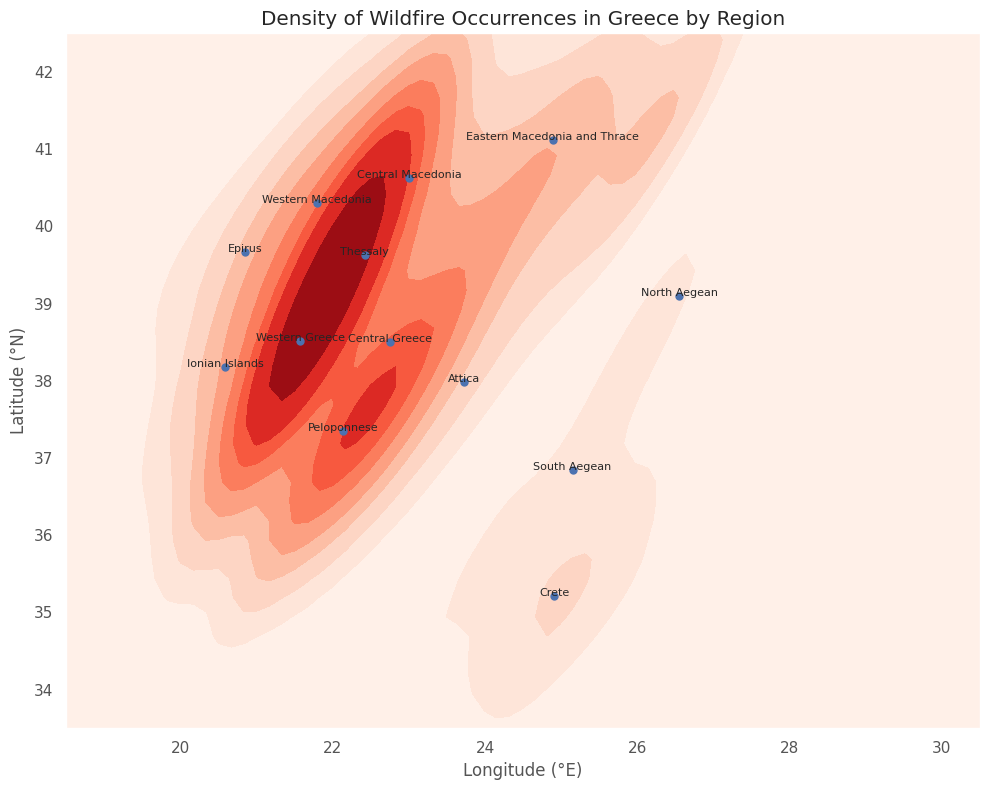

<ipython-input-110-dcdb236f6836>:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_coords['nearest_city'] = None
<ipython-input-110-dcdb236f6836>:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_coords['nearest_city_distance_km'] = float('inf')


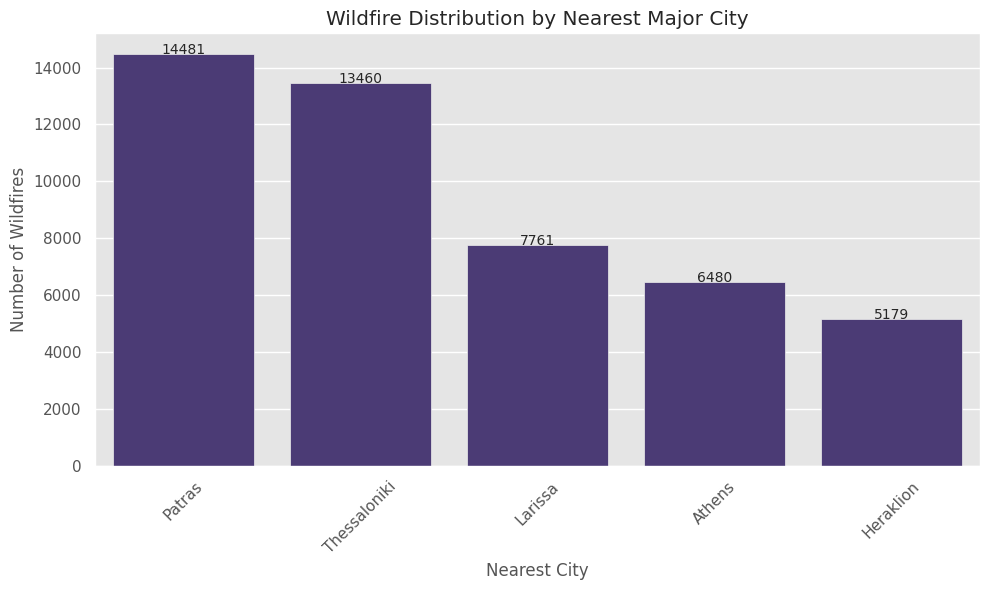

In [111]:
analyze_coordinates_greece(df, lat_col='Y-ENGAGE', lon_col='X-ENGAGE')

Ακολουθεί η παρουσίαση των κατανομών των αριθμητικών μεταβλητών μας καθώς και box plots για εντοπισμό outliers.

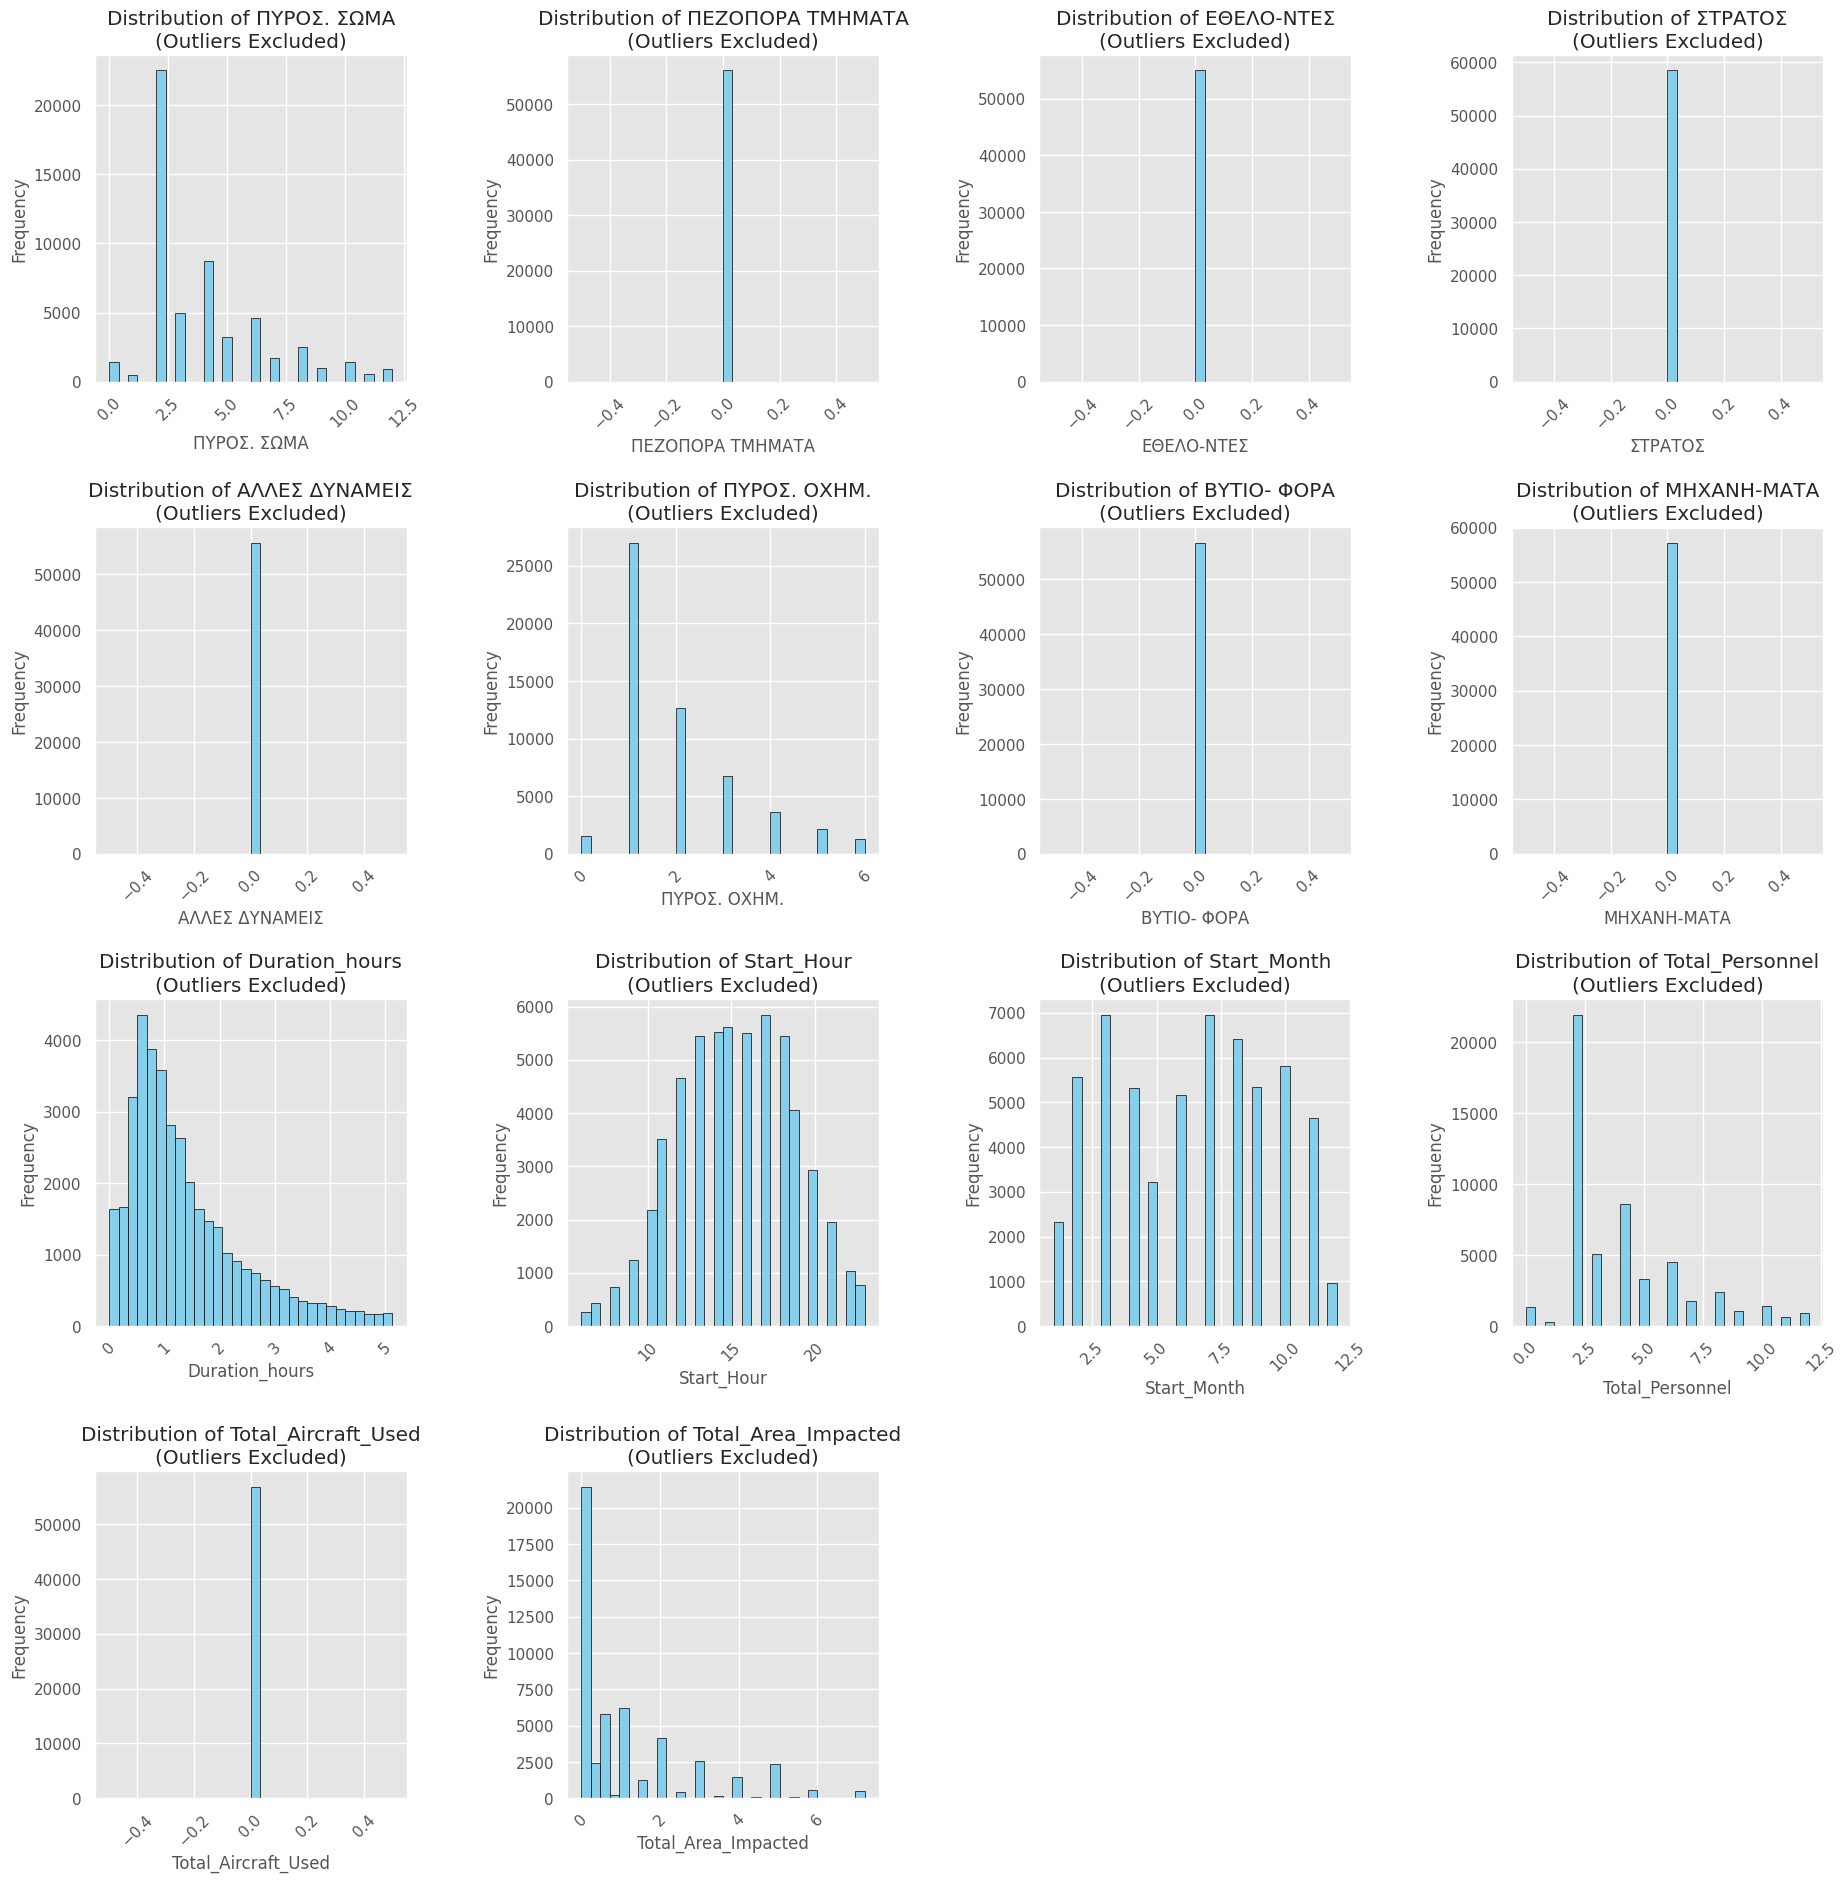

In [112]:
numerical_cols = ['ΠΥΡΟΣ. ΣΩΜΑ', 'ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ', 'ΕΘΕΛΟ-ΝΤΕΣ', 'ΣΤΡΑΤΟΣ', 'ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ', 'ΠΥΡΟΣ. ΟΧΗΜ.',
                  'ΒΥΤΙΟ- ΦΟΡΑ', 'ΜΗΧΑΝΗ-ΜΑΤΑ', 'Duration_hours', 'Start_Hour', 'Start_Month', 'Total_Personnel',
                  'Total_Aircraft_Used', 'Total_Area_Impacted']

# plot the histogram excluding outliers in the same figure for every column (4 plots per row)
# Calculate number of rows needed (4 plots per row)
num_cols = len(numerical_cols)
num_rows = (num_cols + 3) // 4  # Round up division

# Create figure with subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5*num_rows))
fig.tight_layout(pad=8.0)

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    # Calculate IQR to identify outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data excluding outliers
    filtered_data = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)][col]

    # Plot histogram
    axes[i].hist(filtered_data, bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}\n(Outliers Excluded)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

    # Rotate x-axis labels if needed
    axes[i].tick_params(axis='x', rotation=45)

# Hide any empty subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.show()


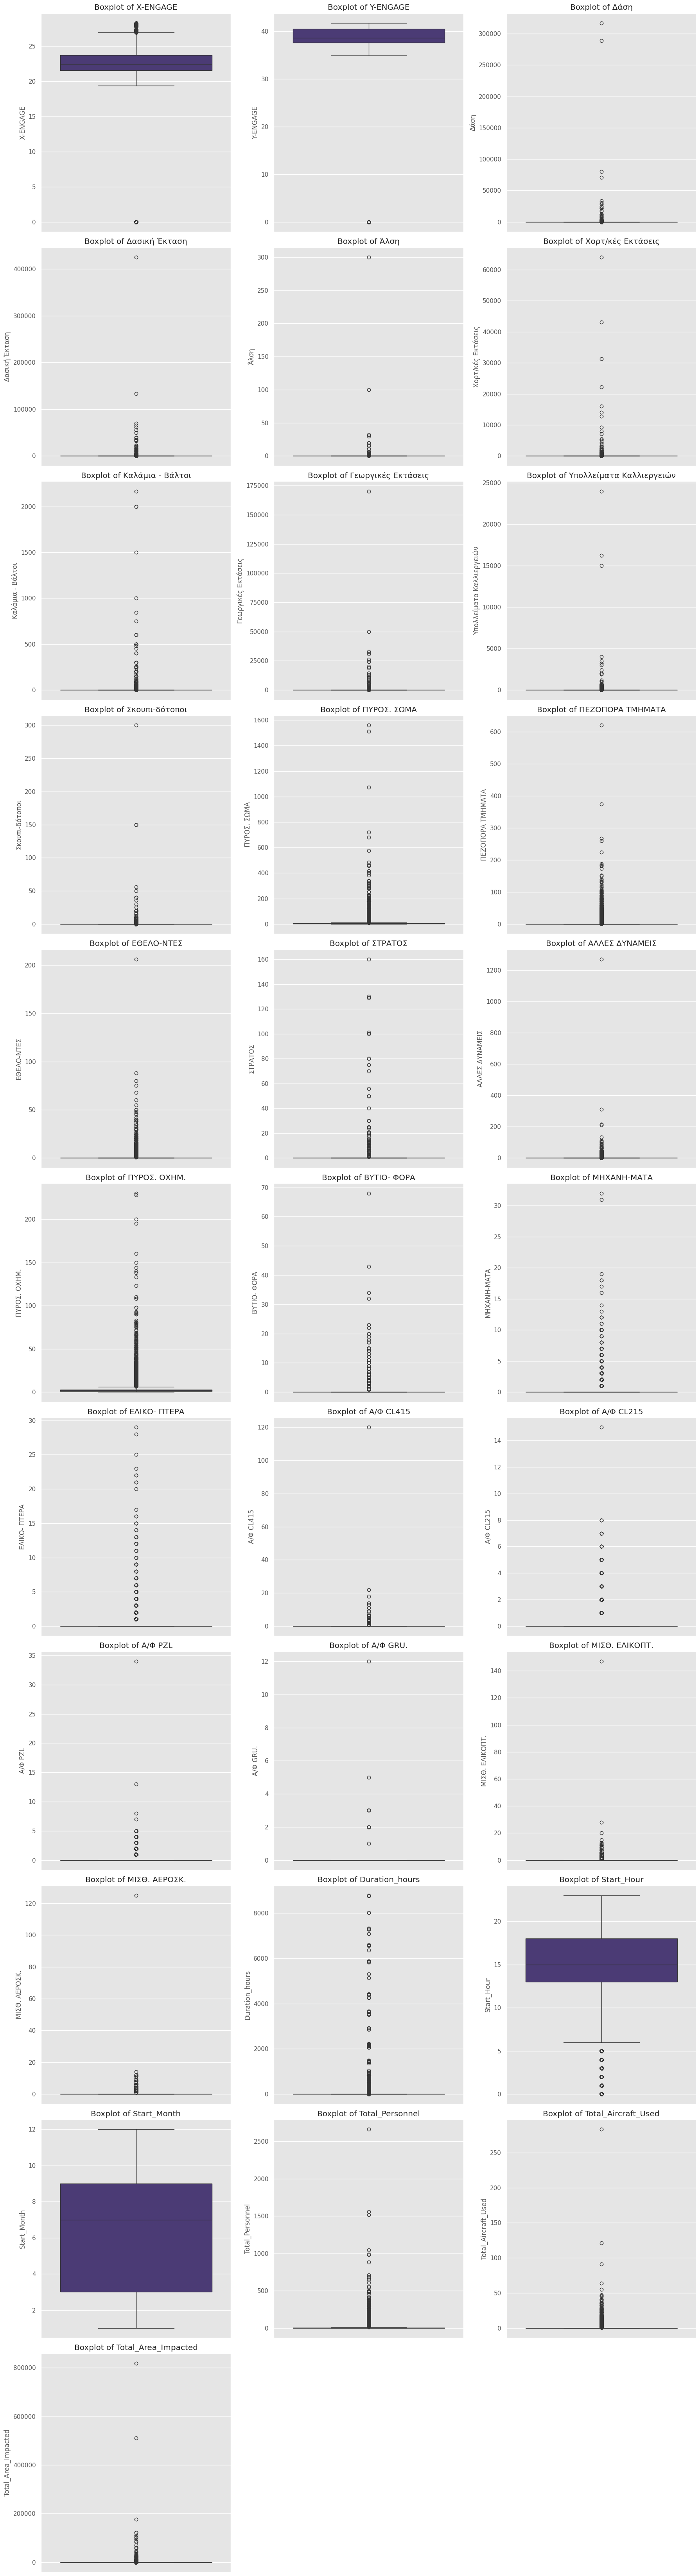

In [113]:
# detect outliers
def plot_numerical_boxplots(df):
    """Generates box plots for all numerical columns in the DataFrame in a grid."""
    numerical_cols = df.select_dtypes(include=np.number).columns
    num_plots = len(numerical_cols)
    num_rows = (num_plots + 2) // 3  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))  # Create grid
    axes = axes.flatten()  # Flatten the axes array for easier iteration

    for i, col in enumerate(numerical_cols):
        sns.boxplot(y=df[col], ax=axes[i])  # Plot on the current subplot
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_ylabel(col)

    # Hide any empty subplots if the number of plots isn't divisible by 3
    for j in range(num_plots, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

plot_numerical_boxplots(df)

Ακολουθούν οι συχνότητες των κατηγορικών μεταβλητών.


Δήμος Analysis
Δήμος
Δ. ΠΥΡΓΟΥ                     0.029079
Δ. ΚΑΛΑΜΑΤΑΣ                  0.023611
Δ. ΠΕΛΛΑΣ                     0.020306
Δ. ΑΓΡΙΝΙΟΥ                   0.020170
Δ. ΙΕΡΑΣ ΠΟΛΗΣ ΜΕΣΟΛΟΓΓΙΟΥ    0.017972
                                ...   
Δ. ΕΥΟΣΜΟΥ-ΚΟΡΔΕΛΙΟΥ          0.000017
Δ. ΒΕΛΒΕΝΤΟΥ                  0.000017
Δ. ΓΑΛΑΤΣΙΟΥ                  0.000017
Δ. ΑΝΤΙΠΑΡΟΥ                  0.000017
Δ. ΣΥΜΗΣ                      0.000017
Name: proportion, Length: 307, dtype: float64


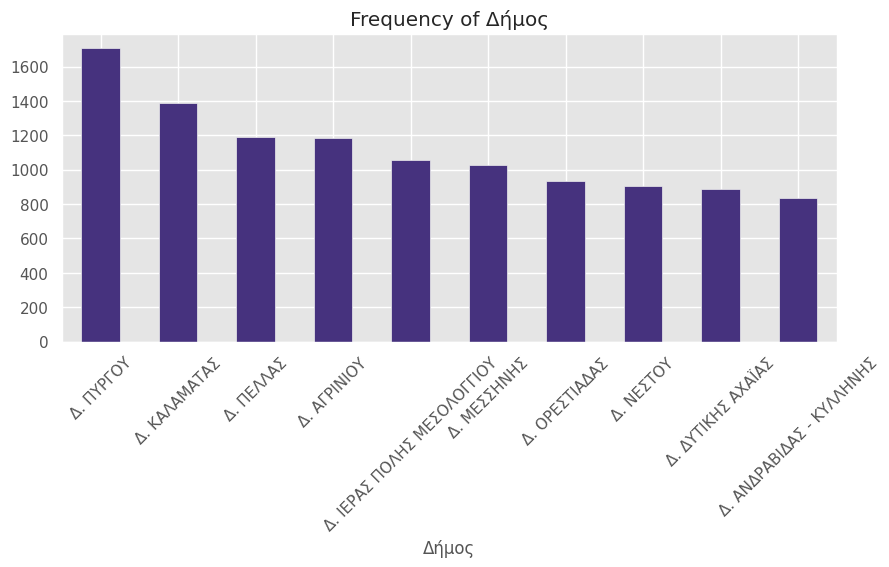


Υπηρεσία Analysis
Υπηρεσία
Π.Υ. ΚΑΛΑΜΑΤΑΣ                 0.039045
Π.Υ. ΠΥΡΓΟΥ                    0.029181
1ος  Π.Σ. ΛΑΡΙΣΑΣ              0.028755
Π.Υ. ΛΕΧΑΙΝΩΝ                  0.023798
Π.Υ. ΓΙΑΝΝΙΤΣΩΝ                0.022333
                                 ...   
2ος  Π.Σ. Π/Α ΣΟΥΔΑΣ ΧΑΝΙΩΝ    0.000017
ΕΘ.Π.Κ. ΒΑΘΕΟΣ ΣΑΜΟΥ           0.000017
ΔΙΟΙΚΗΣΗ Π.Υ. ΠΑΤΡΩΝ           0.000017
ΕΘ.Π.Κ. ΚΟΛΙΝΔΡΟΥ              0.000017
Π.Υ. Π/Α ΑΡΑΞΟΥ                0.000017
Name: proportion, Length: 278, dtype: float64


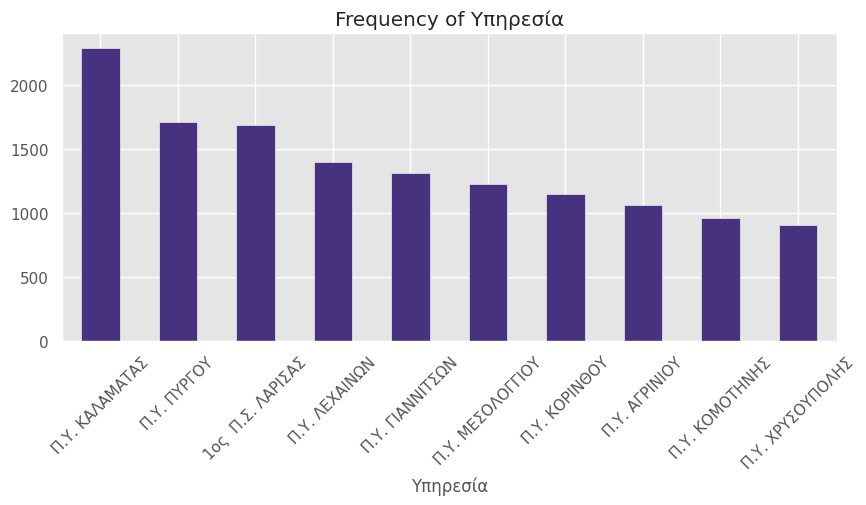


Περιοχή Analysis
Περιοχή
Unknown         0.472403
-               0.096419
ΑΓΡΙΝΙΟ         0.014616
ΜΕΣΟΛΟΓΓΙ       0.005588
ΠΥΡΓΟΣ          0.003458
                  ...   
ΚΑΛΑΝΔΑΡΕ       0.000017
ΠΕΡΒΟΛΑ         0.000017
ΧΡΥΣΩ           0.000017
ΧΩΜΑΤΑΔΑ        0.000017
ΧΩΡΑ ΣΦΑΚΙΩΝ    0.000017
Name: proportion, Length: 2923, dtype: float64


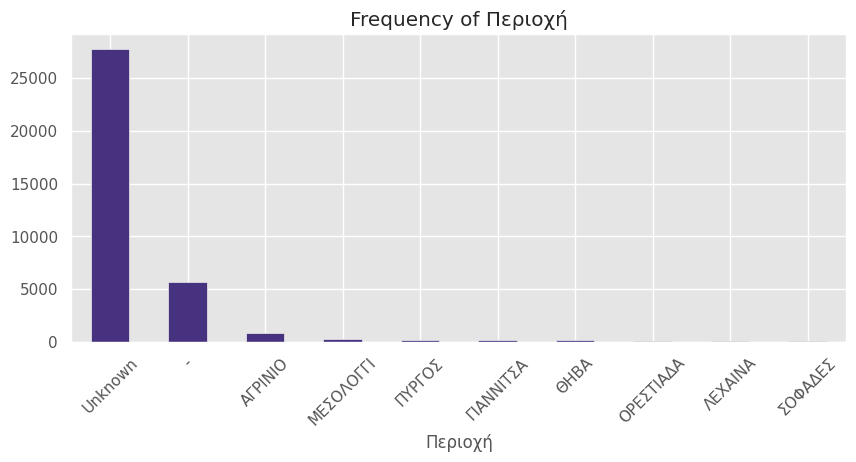


Νομός Analysis
Νομός
ΗΛΕΙΑΣ              0.078481
ΜΕΣΣΗΝΙΑΣ           0.063763
ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ    0.054956
ΛΑΡΙΣΑΣ             0.053865
ΠΕΛΛΑΣ              0.042707
ΕΒΡΟΥ               0.039556
ΚΑΡΔΙΤΣΑΣ           0.033474
ΑΧΑΙΑΣ              0.030919
ΡΟΔΟΠΗΣ             0.029965
ΚΟΡΙΝΘΙΑΣ           0.029079
ΚΑΒΑΛΑΣ             0.027410
ΘΕΣΣΑΛΟΝΙΚΗΣ        0.026285
ΗΡΑΚΛΕΙΟΥ           0.023406
ΒΟΙΩΤΙΑΣ            0.023338
ΚΙΛΚΙΣ              0.022674
ΑΡΓΟΛΙΔΟΣ           0.021192
ΛΑΚΩΝΙΑΣ            0.020050
ΗΜΑΘΙΑΣ             0.019573
ΕΥΒΟΙΑΣ             0.018177
ΠΙΕΡΙΑΣ             0.018108
ΞΑΝΘΗΣ              0.017648
ΑΡΚΑΔΙΑΣ            0.017154
ΤΡΙΚΑΛΩΝ            0.017086
ΛΕΣΒΟΥ              0.017035
ΑΤΤΙΚΗΣ             0.015706
ΡΕΘΥΜΝΟΥ            0.015553
ΦΘΙΩΤΙΔΑΣ           0.014497
ΧΑΝΙΩΝ              0.014327
ΜΑΓΝΗΣΙΑΣ           0.014156
ΚΟΖΑΝΗΣ             0.012248
ΔΡΑΜΑΣ              0.011567
ΚΕΦΑΛΛΟΝΙΑΣ         0.011294
ΚΕΡΚΥΡΑΣ            0.011209
ΣΕΡΡΩΝ              0

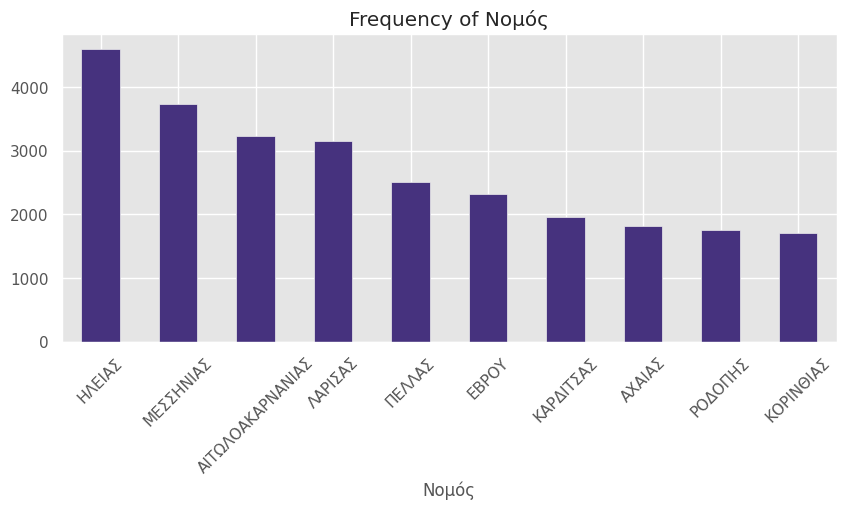


Day_of_Week Analysis
Day_of_Week
Sunday       0.153555
Saturday     0.152482
Friday       0.143470
Wednesday    0.140540
Thursday     0.137917
Monday       0.136367
Tuesday      0.135668
Name: proportion, dtype: float64


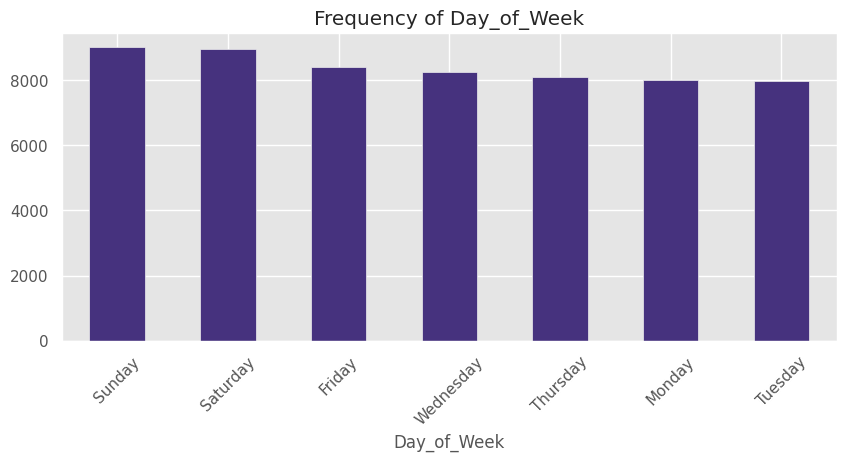


MISSING_COORDS Analysis
MISSING_COORDS
0    0.806804
1    0.193196
Name: proportion, dtype: float64


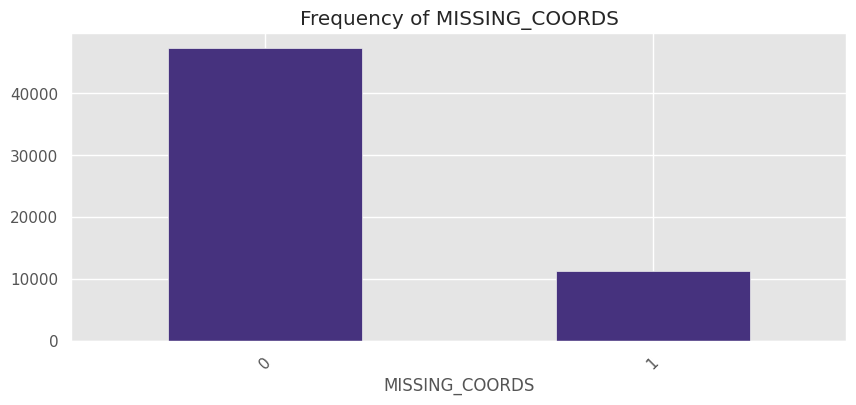


Unresolved Analysis
Unresolved
0    0.740963
1    0.259037
Name: proportion, dtype: float64


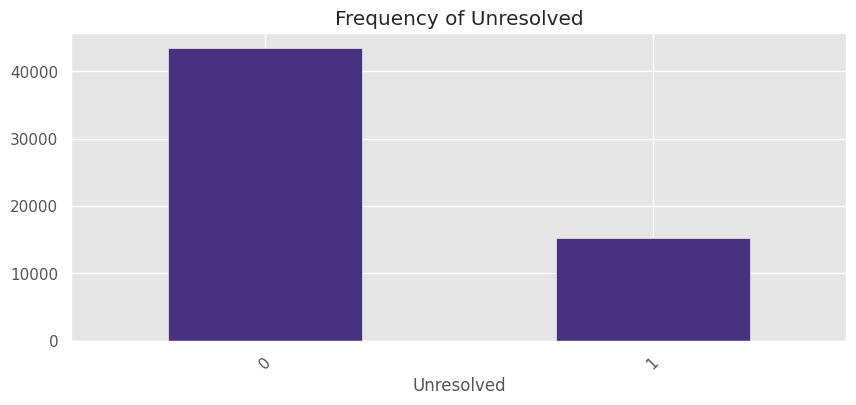


Aircraft_Used Analysis
Aircraft_Used
0    0.967616
1    0.032384
Name: proportion, dtype: float64


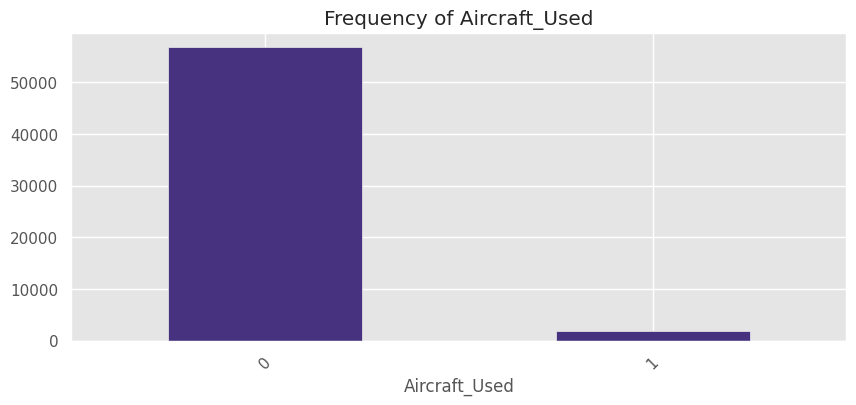


Dominant_Land_Type Analysis
Dominant_Land_Type
Χορτ/κές Εκτάσεις           0.259514
Καλάμια - Βάλτοι            0.216108
Γεωργικές Εκτάσεις          0.199363
Υπολλείματα Καλλιεργειών    0.137031
Δασική Έκταση               0.129944
Δάση                        0.037017
Σκουπι-δότοποι              0.019386
Άλση                        0.001635
Name: proportion, dtype: float64


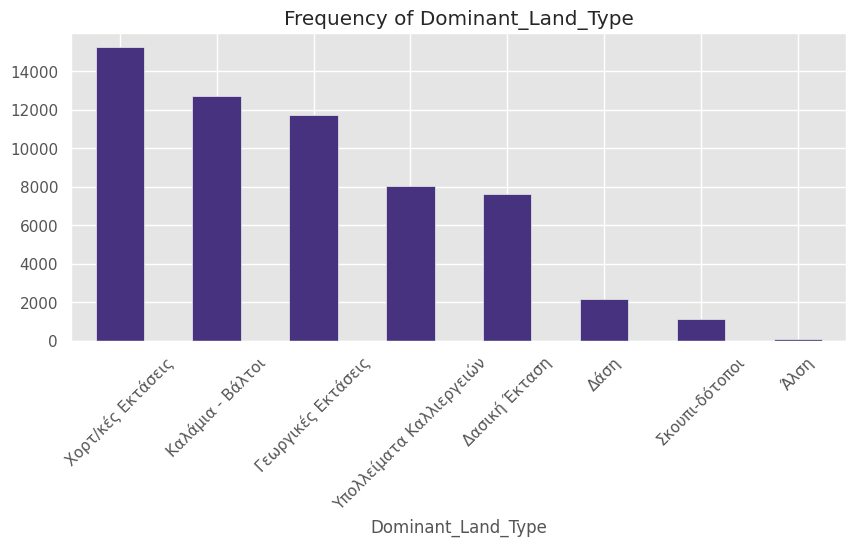


Season Analysis
Season
Summer    0.315952
Autumn    0.269326
Spring    0.263858
Winter    0.150864
Name: proportion, dtype: float64


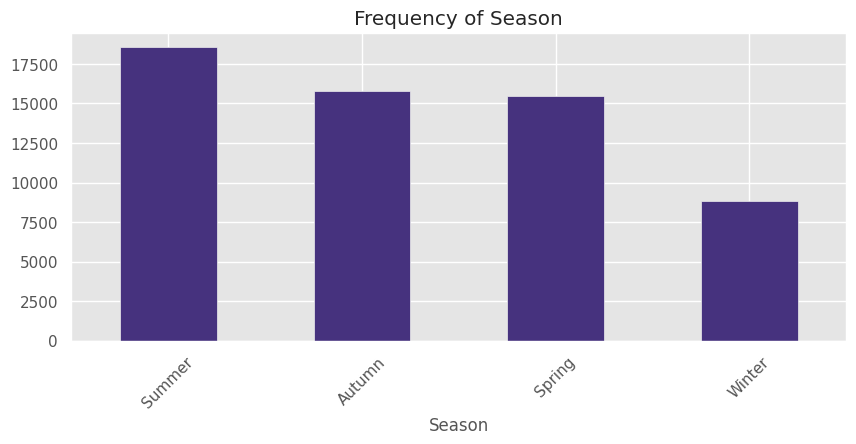

In [114]:
categorical_cols = ['Δήμος', 'Υπηρεσία', 'Περιοχή', 'Νομός', 'Day_of_Week', 'MISSING_COORDS',
                    'Unresolved', 'Aircraft_Used', 'Dominant_Land_Type', 'Season']

for col in categorical_cols:
    if col in df.columns:
        print(f"\n\033[1m{col} Analysis\033[0m")
        print(df[col].value_counts(normalize=True))

        # Plot frequency
        plt.figure(figsize=(10, 4))
        if df[col].nunique() > 10:  # For high-cardinality features
            df[col].value_counts().head(10).plot(kind='bar')
        else:
            df[col].value_counts().plot(kind='bar')
        plt.title(f'Frequency of {col}')
        plt.xticks(rotation=45)
        plt.show()

Τελικά μελετάμε και τη συχνότητα των πυρκαγιών με βάση διάφορους χρονικούς παράγοντες (εποχή, μήνα, ώρα, χρόνο).

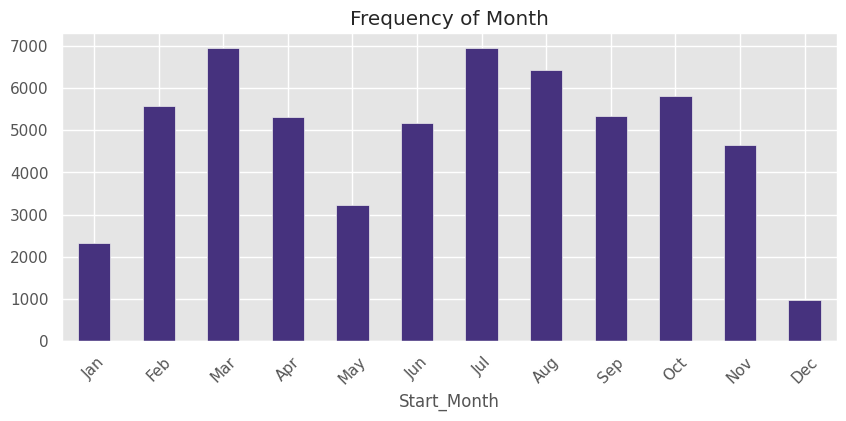

In [115]:
import calendar

plt.figure(figsize=(10, 4))
# Sort by month index before plotting:
month_counts = df['Start_Month'].value_counts().sort_index()
month_counts.plot(kind='bar')

# Set x-axis ticks and labels
plt.xticks(
    ticks=range(len(month_counts)),  # Align with data index
    labels=[calendar.month_abbr[i] for i in month_counts.index],
    rotation=45
)

plt.title('Frequency of Month')
plt.show()

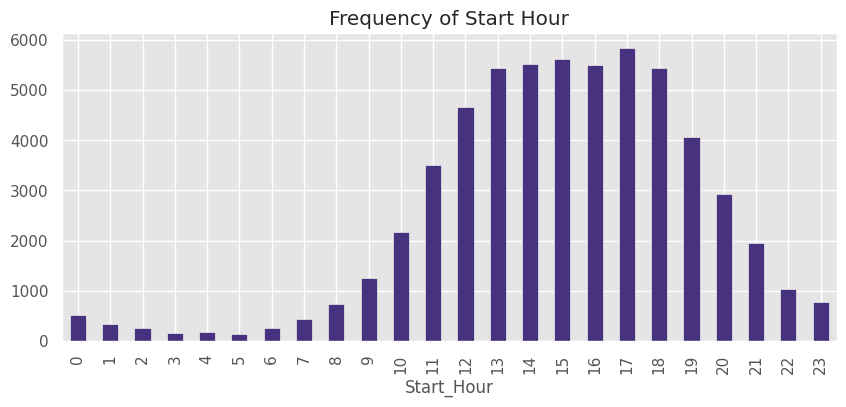

In [116]:
# plot fire frequency by start hour
plt.figure(figsize=(10, 4))
df['Start_Hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Frequency of Start Hour')
plt.show()

#Multivariate Analysis

Εφόσον ο κύριος στόχος μας είναι ο εντοπισμός κύριων **παραγόντων** που οδηγούν σε **μεγάλες πυρκαγιές**, θα πρέπει να βρούμε τρόπο να ποσοτοκοποιήσουμε τη "μεγάλη πυρκαγιά". Αυτό θα γίνει μέσου της μεταβλητής **Total_Area_Impacted** που μετρά τη καταστροφή ως αποτέλεσμα της πυρκαγιάς. Και σε δεύτερο επίπεδο θα χρησημοποιήσουμε και τη μεταβλητή **Duration_Hours** που μπορεί να είναι ένδειξη μεγάλων πυρκαγιών που η κατάσβεση τους ήταν χρονοβόρα. Οπότε βάση αυτών των 2 μεταβλητών και με χρήση των υπόλοιπων 41 μεταβλητές θα προσπαθήσουμε να προσδιορίσουμε τους παράγοντες που οδηγούν σε μεγάλες πυρκαγιές.

<Axes: >

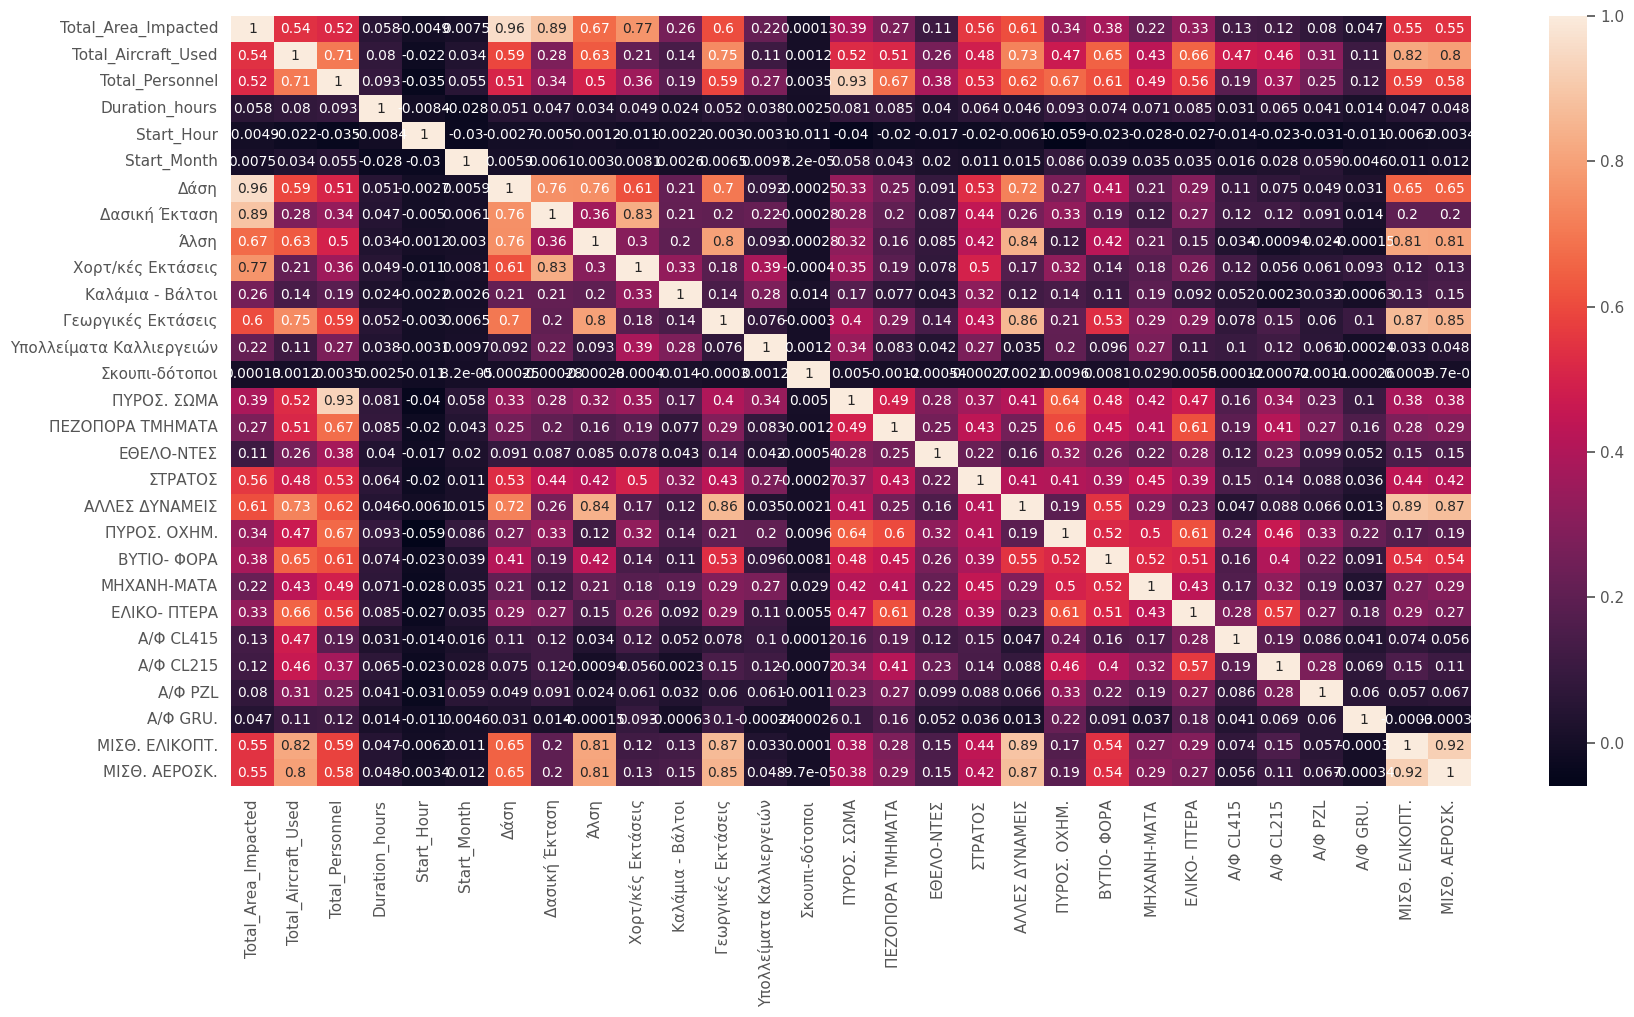

In [117]:
cols = ['Total_Area_Impacted', 'Total_Aircraft_Used', 'Total_Personnel', 'Duration_hours', 'Start_Hour', 'Start_Month',
        'Δάση', 'Δασική Έκταση', 'Άλση', 'Χορτ/κές Εκτάσεις', 'Καλάμια - Βάλτοι', 'Γεωργικές Εκτάσεις', 'Υπολλείματα Καλλιεργειών',
       'Σκουπι-δότοποι', 'ΠΥΡΟΣ. ΣΩΜΑ', 'ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ', 'ΕΘΕΛΟ-ΝΤΕΣ', 'ΣΤΡΑΤΟΣ', 'ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ', 'ΠΥΡΟΣ. ΟΧΗΜ.', 'ΒΥΤΙΟ- ΦΟΡΑ',
       'ΜΗΧΑΝΗ-ΜΑΤΑ', 'ΕΛΙΚΟ- ΠΤΕΡΑ', 'Α/Φ CL415', 'Α/Φ CL215', 'Α/Φ PZL', 'Α/Φ GRU.', 'ΜΙΣΘ. ΕΛΙΚΟΠΤ.', 'ΜΙΣΘ. ΑΕΡΟΣΚ.']

corr = df[cols].dropna().corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)

###Χρονικές Μεταβλητές

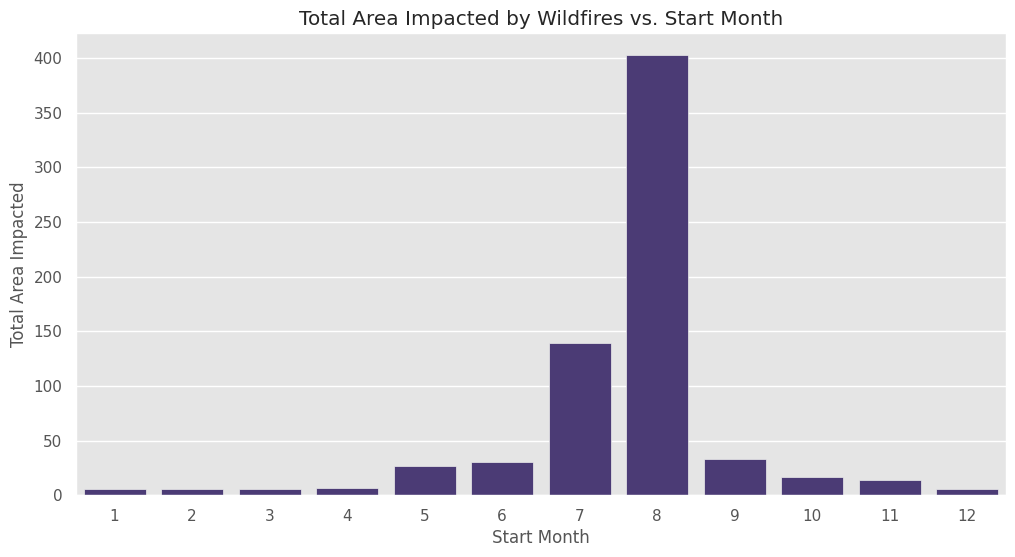

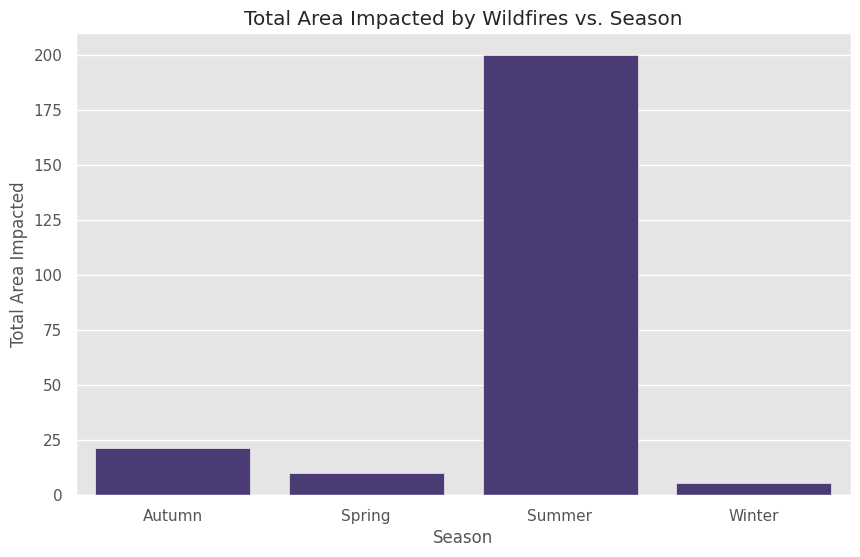

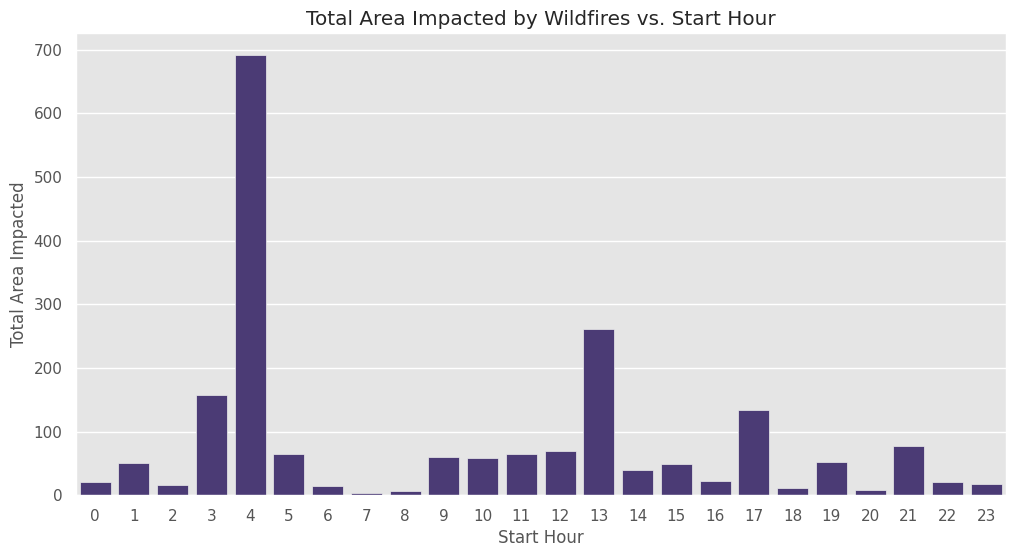

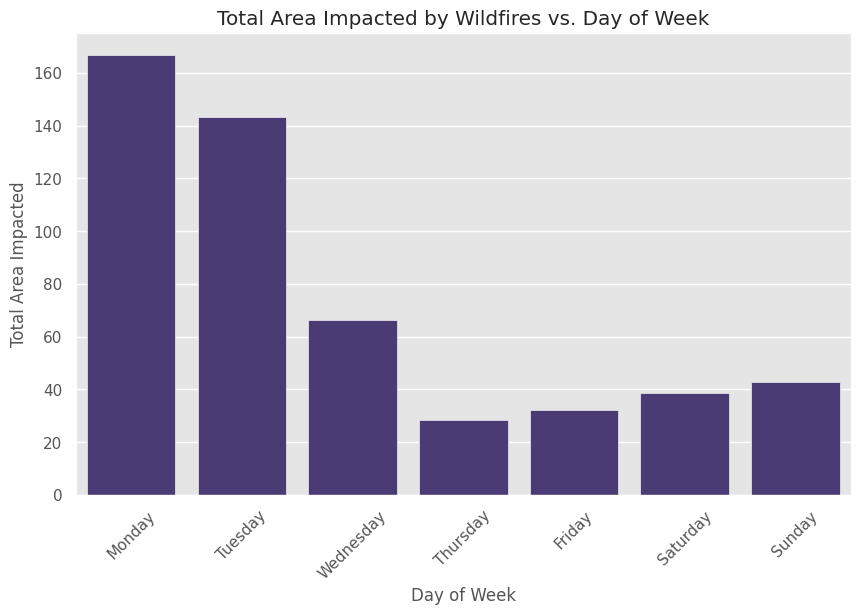

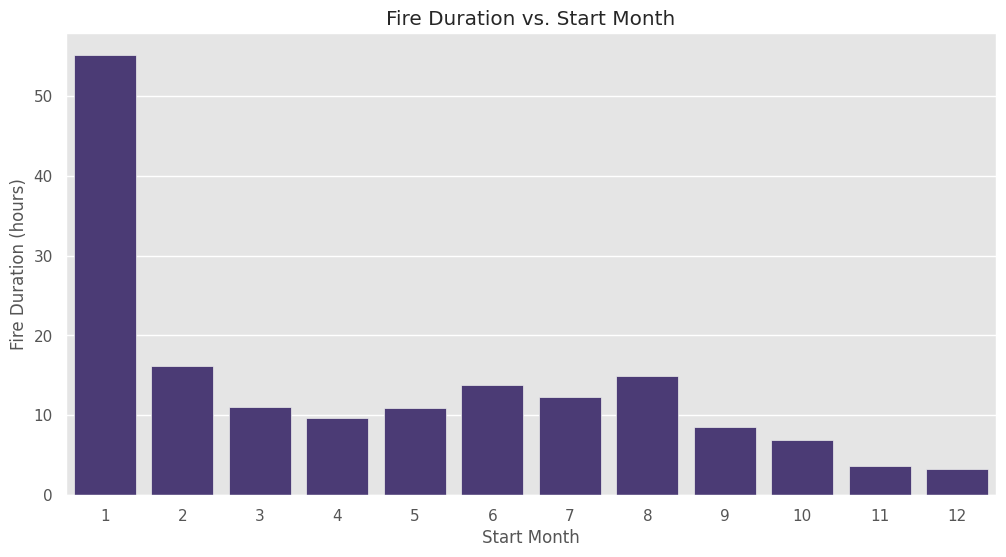

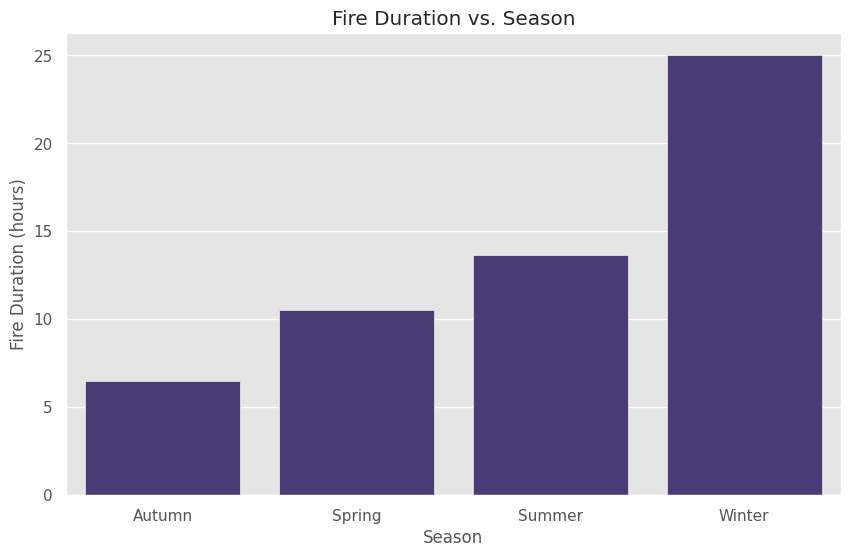

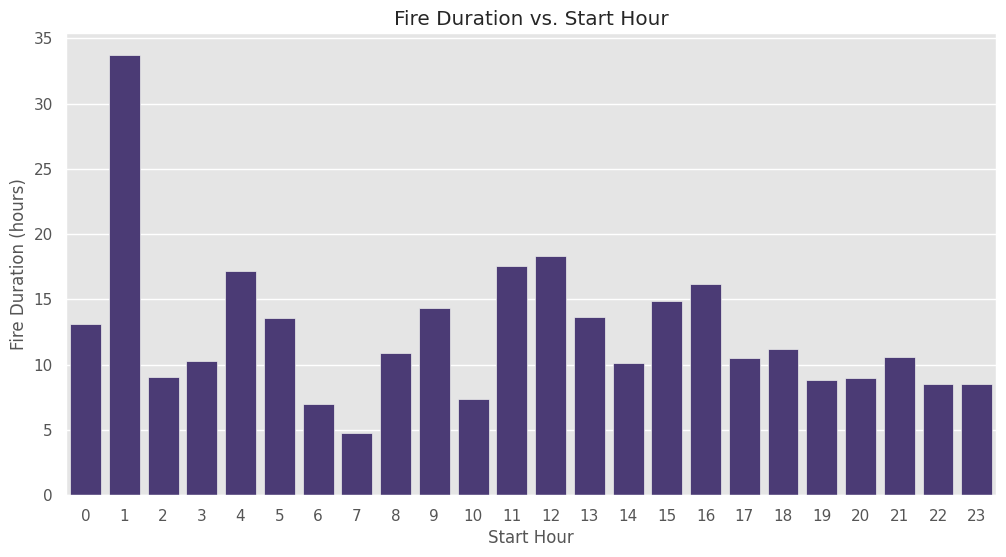

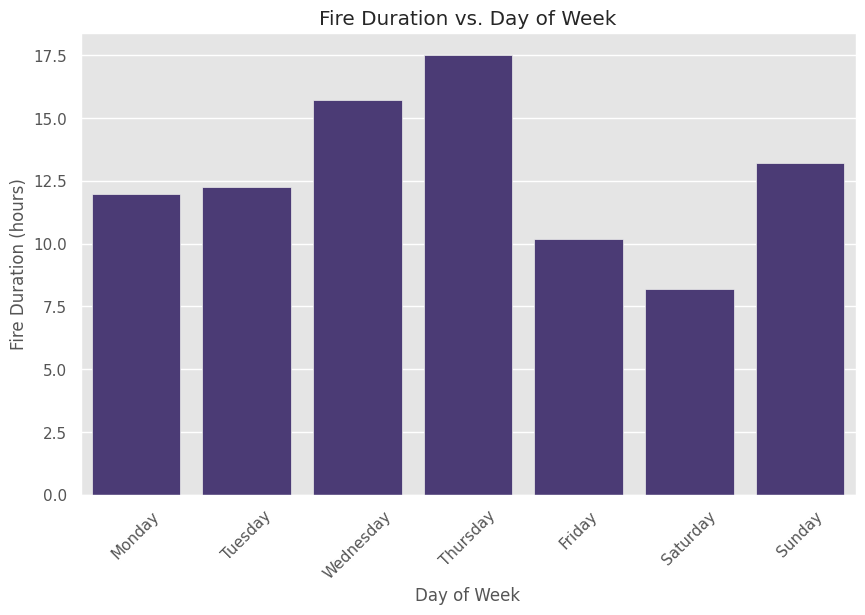

In [118]:
# --- Start_Month / Season vs. Total_Area_Impacted ---
plt.figure(figsize=(12, 6))
sns.barplot(x='Start_Month', y='Total_Area_Impacted', data=df, errorbar=None)
plt.title('Total Area Impacted by Wildfires vs. Start Month')
plt.xlabel('Start Month')
plt.ylabel('Total Area Impacted')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Total_Area_Impacted', data=df, errorbar=None)
plt.title('Total Area Impacted by Wildfires vs. Season')
plt.xlabel('Season')
plt.ylabel('Total Area Impacted')
plt.show()

# Insight: These plots can help you identify if there are specific months or seasons where wildfires tend to have a larger impact on total area burned. For example, you might see that summer months have a higher median and a wider range of total area impacted compared to other seasons.

# --- Start_Hour vs. Total_Area_Impacted ---
plt.figure(figsize=(12, 6))
sns.barplot(x='Start_Hour', y='Total_Area_Impacted', data=df, errorbar=None)
plt.title('Total Area Impacted by Wildfires vs. Start Hour')
plt.xlabel('Start Hour')
plt.ylabel('Total Area Impacted')
plt.show()

# Insight: This plot can reveal if fires starting at certain times of the day tend to have a larger impact. A smoothing line (or binned boxplots) can help visualize the general trend. For instance, you might observe an increase in total area impacted for fires starting during midday hours.


# --- Day_of_Week vs. Total_Area_Impacted ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Day_of_Week', y='Total_Area_Impacted', data=df, errorbar=None, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Total Area Impacted by Wildfires vs. Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Area Impacted')
plt.xticks(rotation=45)
plt.show()

# Insight: This plot helps you assess if there are differences in the impact of wildfires based on the day of the week. For example, you might find that weekends or holidays have a larger spread or higher median for total area impacted, potentially indicating delays in response times.



# --- Analysis for Fire Duration (excluding NaN values) ---
duration_df = df.dropna(subset=['Duration_hours'])  # Remove rows with NaN duration


# --- Start_Month / Season vs. Duration_hours ---
plt.figure(figsize=(12, 6))
sns.barplot(x='Start_Month', y='Duration_hours', data=duration_df, errorbar=None)
plt.title('Fire Duration vs. Start Month')
plt.xlabel('Start Month')
plt.ylabel('Fire Duration (hours)')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Duration_hours', data=duration_df, errorbar=None)
plt.title('Fire Duration vs. Season')
plt.xlabel('Season')
plt.ylabel('Fire Duration (hours)')
plt.show()

# --- Start_Hour vs. Duration_hours ---
plt.figure(figsize=(12, 6))
sns.barplot(x='Start_Hour', y='Duration_hours', data=duration_df, errorbar=None)
plt.title('Fire Duration vs. Start Hour')
plt.xlabel('Start Hour')
plt.ylabel('Fire Duration (hours)')
plt.show()

# --- Day_of_Week vs. Duration_hours ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Day_of_Week', y='Duration_hours', data=duration_df, errorbar=None, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Fire Duration vs. Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Fire Duration (hours)')
plt.xticks(rotation=45)
plt.show()

Προσπαθούμε να δούμε αν η έλλειψη ημερομηνία κατάσβεσής σχετίζεται με τη μη γνώση της περιοχής.

In [119]:
# Create a cross-tabulation (contingency table)
cols = ['Δήμος', 'Υπηρεσία', 'Περιοχή', 'Νομός', 'Day_of_Week', 'MISSING_COORDS',
        'Unresolved', 'Aircraft_Used', 'Dominant_Land_Type', 'Season']
cross_tab = pd.crosstab(df['Unresolved'], df['Περιοχή'], normalize='index')

# Display the cross-tabulation
print(cross_tab)

Περιοχή      ΚΑΣΤΕΛΙΑΝΑ ΑΝΩ         -   Unknown      ΑΒΑΣ     ΑΒΑΤΟ   ΑΒΓΑΡΙΑ  \
Unresolved                                                                      
0                  0.000023  0.089548  0.407233  0.000368  0.000368  0.000046   
1                  0.000000  0.116073  0.658819  0.000132  0.000197  0.000000   

Περιοχή      ΑΒΔΕΛΛΑ    ΑΒΔΗΡΑ     ΑΒΔΟΥ      ΑΒΙΑ   ΑΒΡΑΜΙΟ  ΑΒΡΑΜΥΛΙΑ  \
Unresolved                                                                
0           0.000023  0.001058  0.000092  0.000046  0.000023   0.000092   
1           0.000066  0.000526  0.000000  0.000000  0.000000   0.000000   

Περιοχή       ΑΓΑΛΑΣ  ΑΓΑΛΙΑΝΟΣ     ΑΓΑΠΗ  ΑΓΓΕΛΙΑΝΑ  ΑΓΓΕΛΟΚΑΣΤΡΟ  ΑΓΓΕΛΩΝΑ  \
Unresolved                                                                     
0           0.000161   0.000023  0.000046   0.000161      0.000345  0.000046   
1           0.000066   0.000000  0.000000   0.000066      0.000000  0.000000   

Περιοχή      ΑΓΓΙΣΤΑ   ΑΓΔΙΝΕΣ      ΑΓΙΑ  ΑΓΙΑ ΑΝΝΑ  

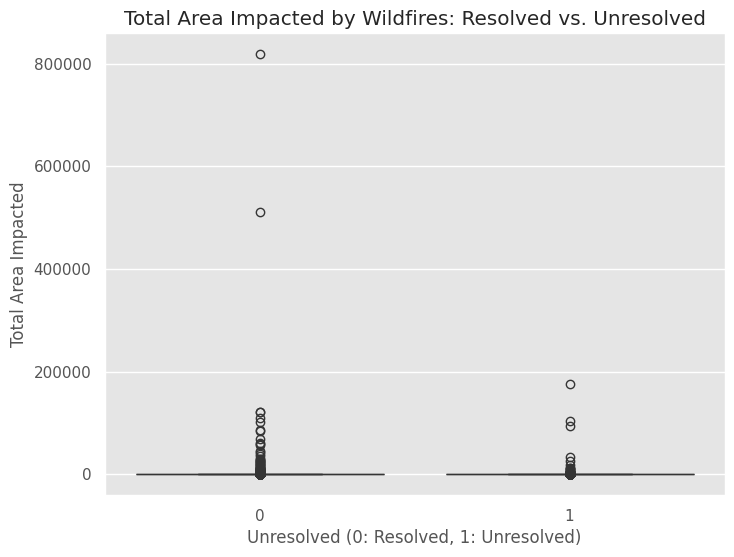

Median Total Area Impacted (Resolved): 1.0
Median Total Area Impacted (Unresolved): 0.5


In [120]:
# Create a boxplot to visualize the distribution of Total_Area_Impacted for resolved and unresolved fires
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.boxplot(x='Unresolved', y='Total_Area_Impacted', data=df)
plt.title('Total Area Impacted by Wildfires: Resolved vs. Unresolved')
plt.xlabel('Unresolved (0: Resolved, 1: Unresolved)')
plt.ylabel('Total Area Impacted')
plt.show()

# Calculate the median Total_Area_Impacted for resolved and unresolved fires
median_area_resolved = df[df['Unresolved'] == 0]['Total_Area_Impacted'].median()
median_area_unresolved = df[df['Unresolved'] == 1]['Total_Area_Impacted'].median()

print(f"Median Total Area Impacted (Resolved): {median_area_resolved}")
print(f"Median Total Area Impacted (Unresolved): {median_area_unresolved}")

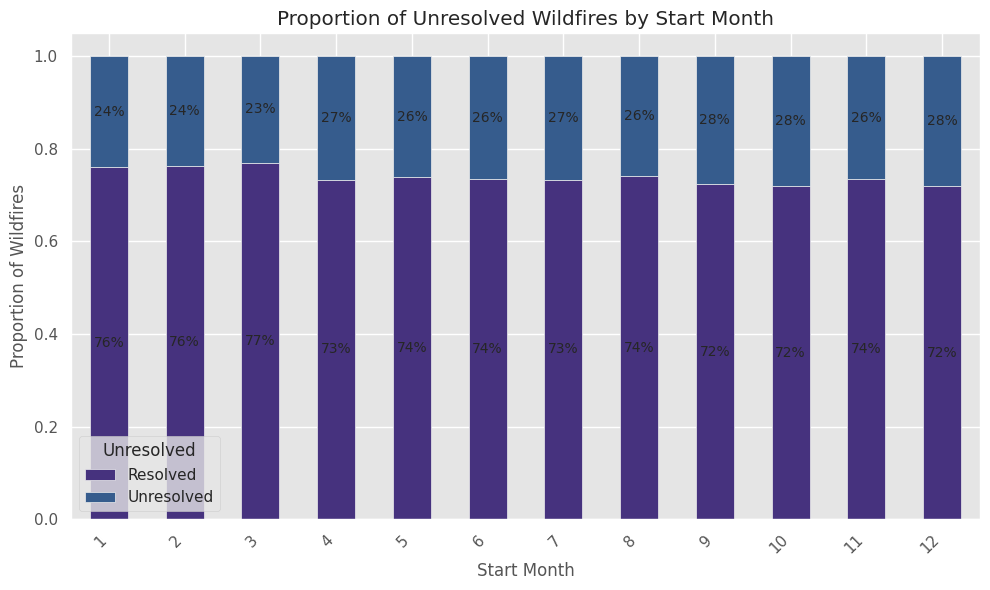

In [121]:
# Create a cross-tabulation (contingency table)
cross_tab = pd.crosstab(df['Start_Month'], df['Unresolved'], normalize='index')

# Create a stacked bar plot
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Proportion of Unresolved Wildfires by Start Month')
plt.xlabel('Start Month')
plt.ylabel('Proportion of Wildfires')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Unresolved', labels=['Resolved', 'Unresolved'])

# Add percentage labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.0%}', ha='center', va='center')

plt.tight_layout()
plt.show()

###Χωρικές Μεταβλητές

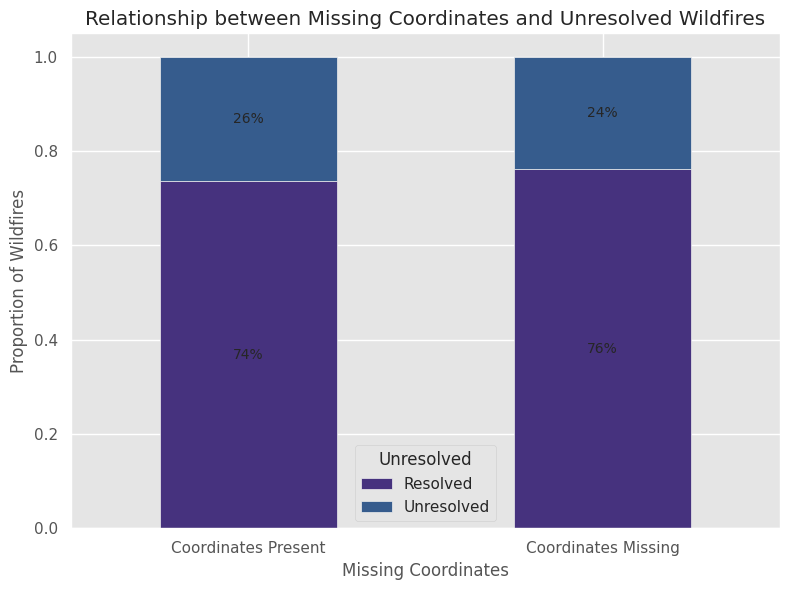

In [122]:
# Create a cross-tabulation (contingency table)
cross_tab = pd.crosstab(df['MISSING_COORDS'], df['Unresolved'], normalize='index')

# Create a stacked bar plot
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(8, 6))

# Customize the plot
plt.title('Relationship between Missing Coordinates and Unresolved Wildfires')
plt.xlabel('Missing Coordinates')
plt.ylabel('Proportion of Wildfires')
plt.xticks([0, 1], ['Coordinates Present', 'Coordinates Missing'], rotation=0)  # Customize x-axis labels
plt.legend(title='Unresolved', labels=['Resolved', 'Unresolved'])

# Add percentage labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.0%}', ha='center', va='center')

plt.tight_layout()
plt.show()

In [123]:
# Create a cross-tabulation (contingency table)
cols = ['Δήμος', 'Υπηρεσία', 'Περιοχή', 'Νομός', 'Day_of_Week', 'MISSING_COORDS',
        'Unresolved', 'Aircraft_Used', 'Dominant_Land_Type', 'Season']
cross_tab = pd.crosstab(df['MISSING_COORDS'], df['Dominant_Land_Type'], normalize='index')

# Display the cross-tabulation
print(cross_tab)

Dominant_Land_Type      Άλση  Γεωργικές Εκτάσεις      Δάση  Δασική Έκταση  \
MISSING_COORDS                                                              
0                   0.001626            0.198581  0.037731       0.132493   
1                   0.001675            0.202628  0.034036       0.119302   

Dominant_Land_Type  Καλάμια - Βάλτοι  Σκουπι-δότοποι  \
MISSING_COORDS                                         
0                           0.221364        0.017187   
1                           0.194163        0.028569   

Dominant_Land_Type  Υπολλείματα Καλλιεργειών  Χορτ/κές Εκτάσεις  
MISSING_COORDS                                                   
0                                   0.138257           0.252761  
1                                   0.131911           0.287717  


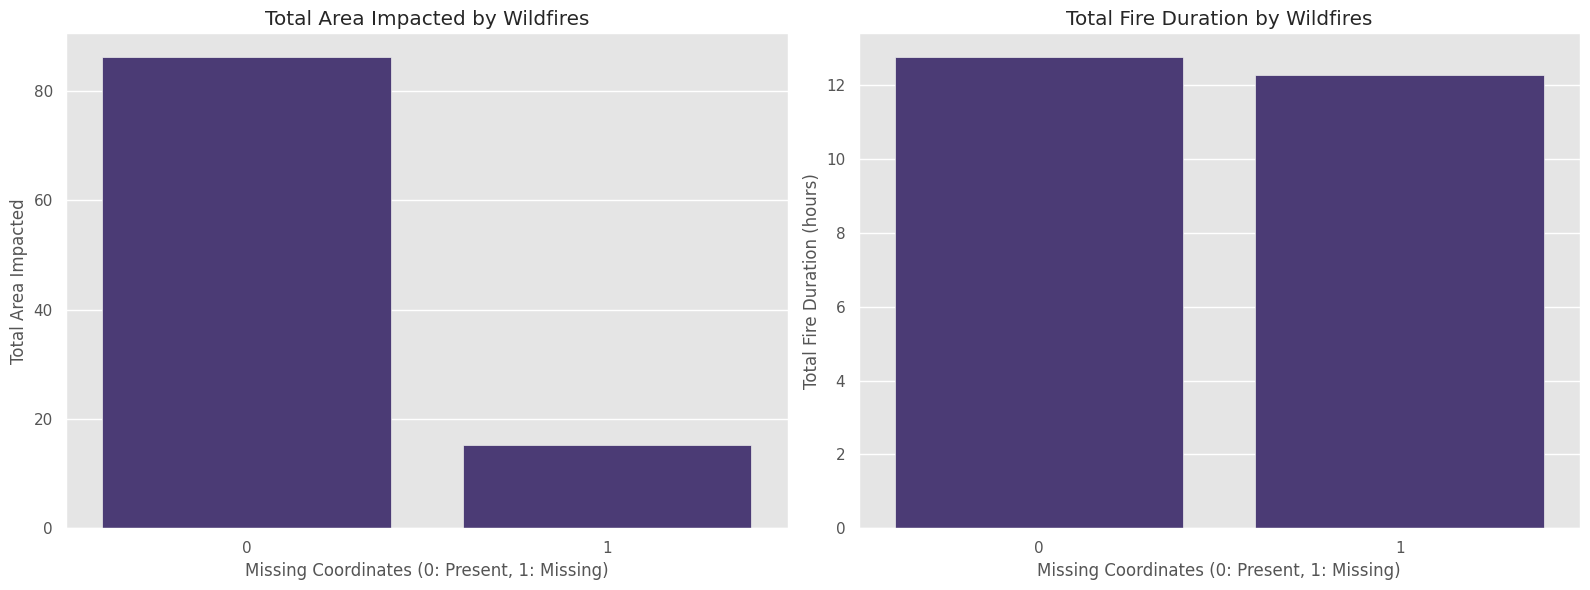

In [124]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plot Total Area Impacted
sns.barplot(x='MISSING_COORDS', y='Total_Area_Impacted', data=df, errorbar=None, ax=axes[0])
axes[0].set_title('Total Area Impacted by Wildfires')
axes[0].set_xlabel('Missing Coordinates (0: Present, 1: Missing)')
axes[0].set_ylabel('Total Area Impacted')

# Plot Fire Duration
sns.barplot(x='MISSING_COORDS', y='Duration_hours', data=df, errorbar = None, ax=axes[1])
axes[1].set_title('Total Fire Duration by Wildfires')
axes[1].set_xlabel('Missing Coordinates (0: Present, 1: Missing)')
axes[1].set_ylabel('Total Fire Duration (hours)')

# Adjust layout
plt.tight_layout()
plt.show()

###Καμμένες Εκτάσεις

<ipython-input-125-1057fdbfc425>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Start_Month', 'Dominant_Land_Type'])['Total_Area_Impacted'].sum().reset_index()


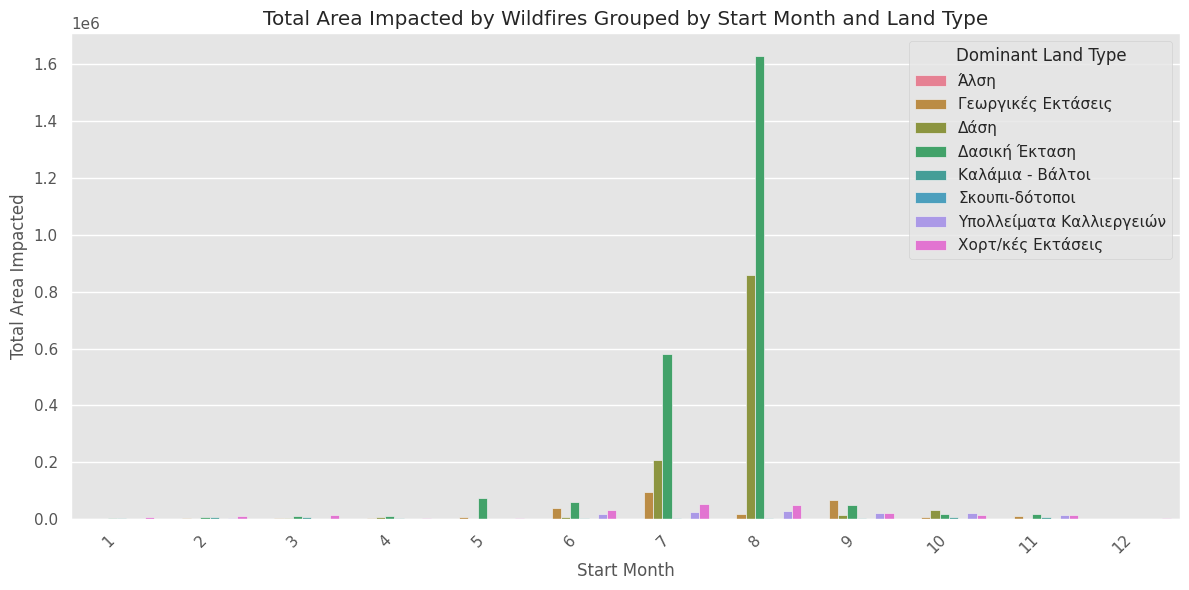

In [125]:
# Group data by Start_Month and Dominant_Land_Type, then sum Total_Area_Impacted
grouped_data = df.groupby(['Start_Month', 'Dominant_Land_Type'])['Total_Area_Impacted'].sum().reset_index()

# Create grouped bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Start_Month', y='Total_Area_Impacted', hue='Dominant_Land_Type', data=grouped_data)
plt.title('Total Area Impacted by Wildfires Grouped by Start Month and Land Type')
plt.xlabel('Start Month')
plt.ylabel('Total Area Impacted')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Dominant Land Type')
plt.tight_layout()
plt.show()

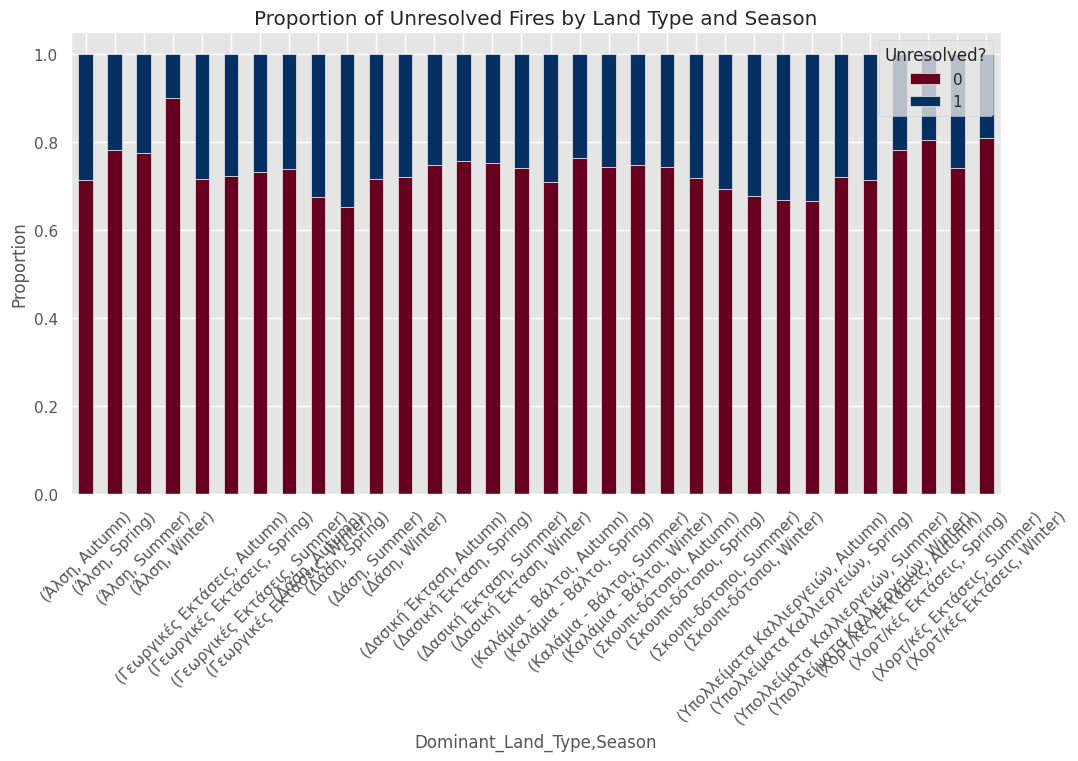

In [126]:
# Crosstab with land type and season, stacked by 'Unresolved'
ct = pd.crosstab(
    index=[df['Dominant_Land_Type'], df['Season']],
    columns=df['Unresolved'],
    normalize='index'  # % per group
)

ct.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='RdBu')
plt.title('Proportion of Unresolved Fires by Land Type and Season')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Unresolved?')
plt.show()

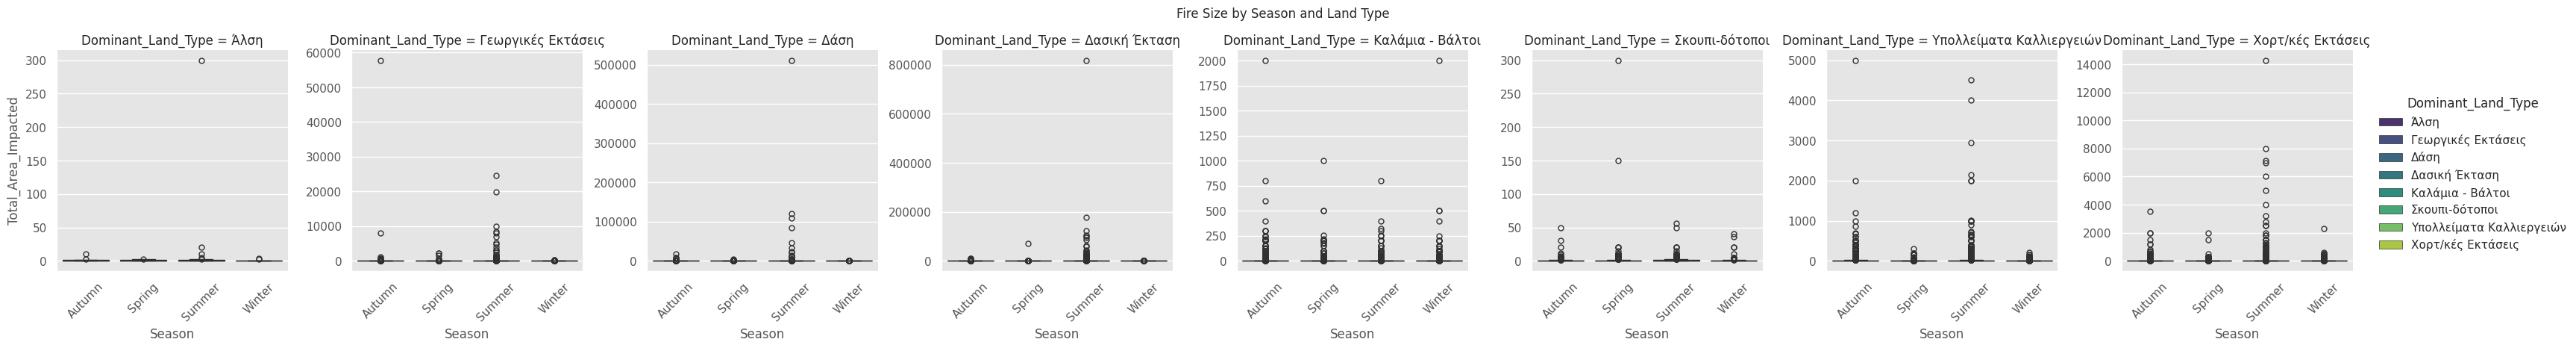

In [127]:
# Filter data for clarity
df_subset = df[df['Dominant_Land_Type'].isin(['Δάση', 'Γεωργικές Εκτάσεις', 'Χορτ/κές Εκτάσεις', 'Δασική Έκταση', 'Σκουπι-δότοποι', 'Άλση', 'Υπολλείματα Καλλιεργειών', 'Καλάμια - Βάλτοι'])]

# Faceted boxplot
g = sns.catplot(
    data=df_subset,
    x='Season',
    y='Total_Area_Impacted',
    hue='Dominant_Land_Type',
    col='Dominant_Land_Type',  # Facet by land type
    kind='box',
    height=4,
    aspect=1,
    palette='viridis',
    sharey=False
)
g.set_xticklabels(rotation=45)
g.fig.suptitle('Fire Size by Season and Land Type', y=1.05)
plt.show()

###Recources variables

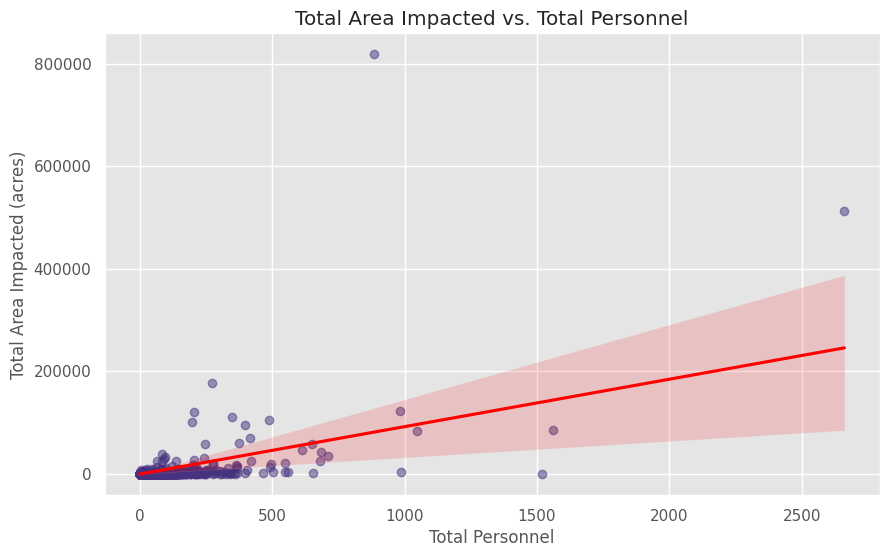

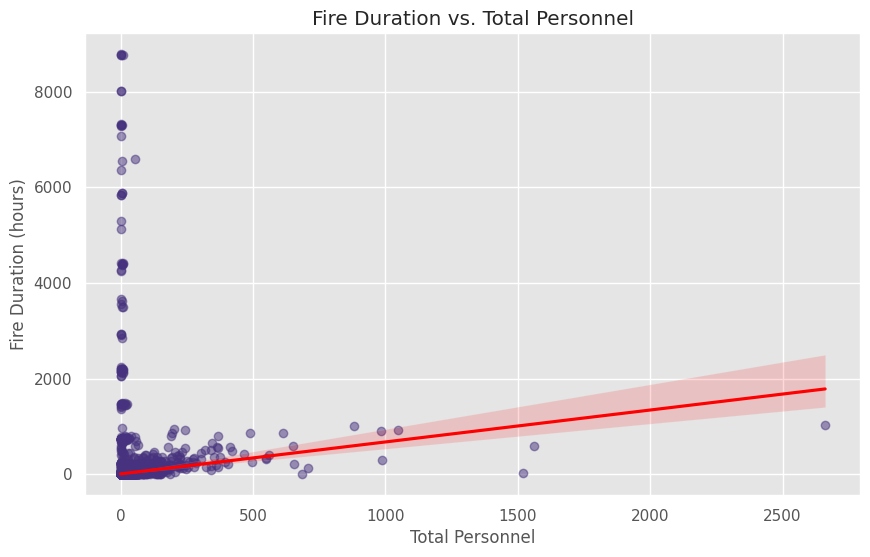

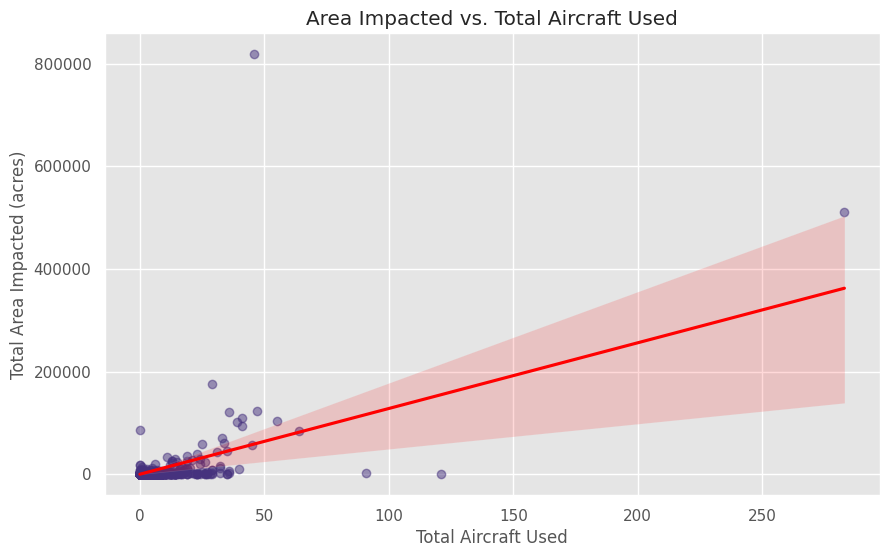

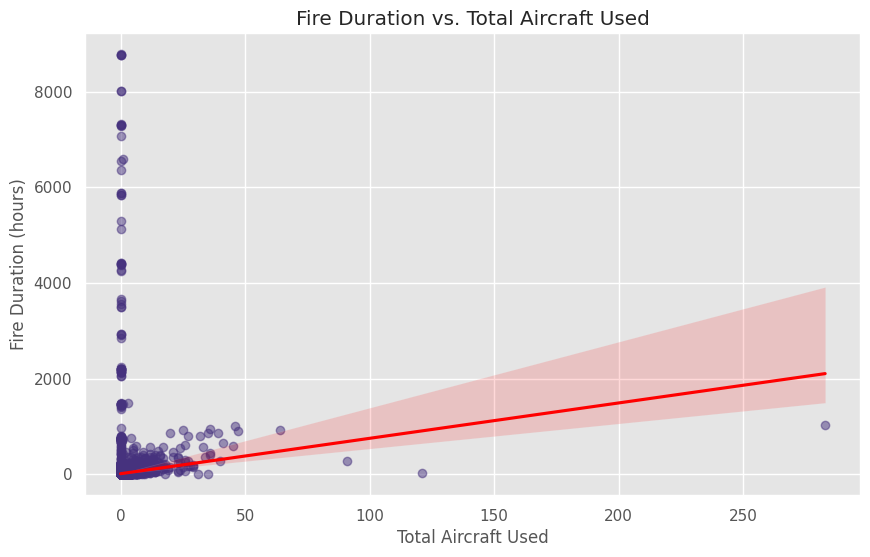

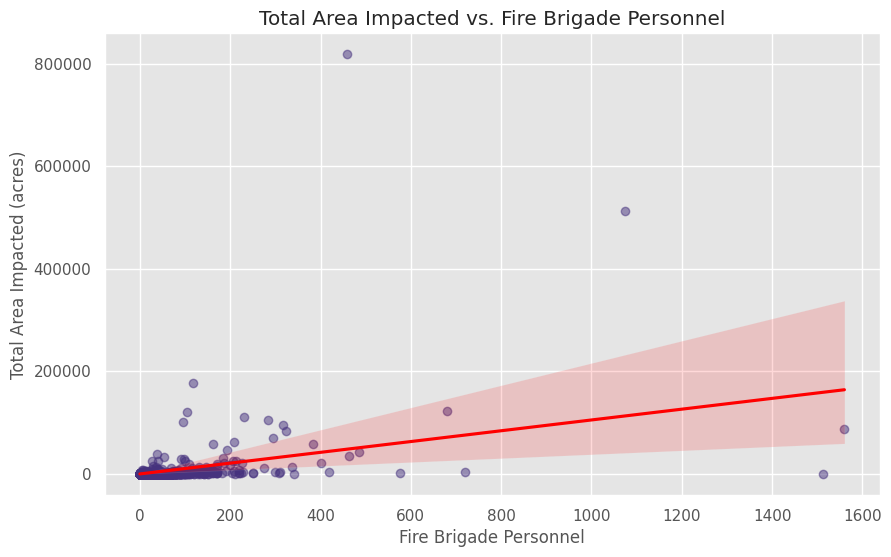

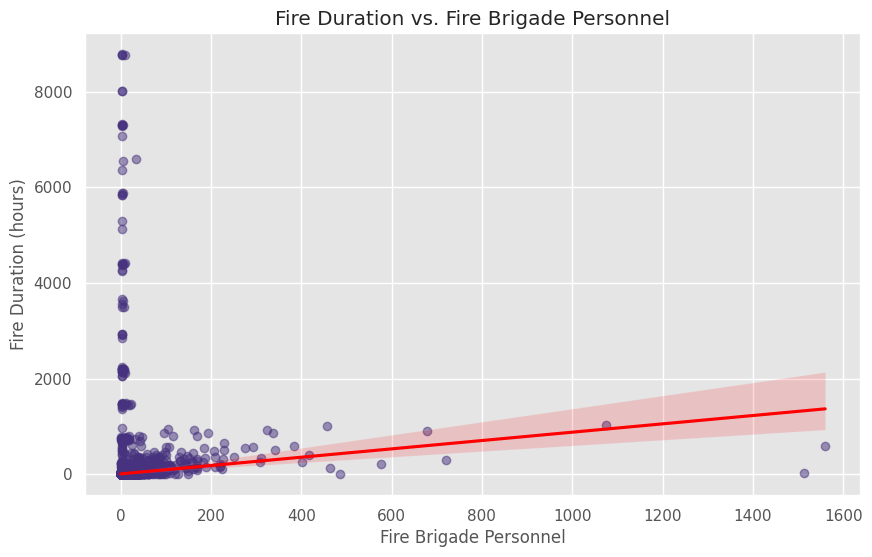

In [128]:
# 3. Response Resources vs. Fire Outcomes

# --- Total_Personnel vs. Total_Area_Impacted ---
plt.figure(figsize=(10, 6))
sns.regplot(x='Total_Personnel', y='Total_Area_Impacted', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Total Area Impacted vs. Total Personnel')
plt.xlabel('Total Personnel')
plt.ylabel('Total Area Impacted (acres)')
plt.show()

# Insight: More personnel might reduce fire size (or could indicate reverse causality—larger fires attract more resources).

# --- Total Personel vs. Duration_hours ---
plt.figure(figsize=(10, 6))
sns.regplot(x='Total_Personnel', y='Duration_hours', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Fire Duration vs. Total Personnel')
plt.xlabel('Total Personnel')
plt.ylabel('Fire Duration (hours)')
plt.show()


# --- Total_Aircraft_Used vs. Total_Area_Impacted ---
plt.figure(figsize=(10, 6))
sns.regplot(x='Total_Aircraft_Used', y='Total_Area_Impacted', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
#sns.jointplot(x='Total_Aircraft_Used', y='Duration_hours', data=df, kind='hex')
plt.title('Area Impacted vs. Total Aircraft Used')
plt.xlabel('Total Aircraft Used')
plt.ylabel('Total Area Impacted (acres)')
plt.show()

# --- Total_Aircraft_Used vs. Duration_hours ---
plt.figure(figsize=(10, 6))
sns.regplot(x='Total_Aircraft_Used', y='Duration_hours', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
#sns.jointplot(x='Total_Aircraft_Used', y='Duration_hours', data=df, kind='hex')
plt.title('Fire Duration vs. Total Aircraft Used')
plt.xlabel('Total Aircraft Used')
plt.ylabel('Fire Duration (hours)')
plt.show()

# Insight: Aircraft effectiveness in shortening fire duration.

# --- ΠΥΡΟΣ. ΣΩΜΑ (Fire Brigade) vs. Total_Area_Impacted ---
plt.figure(figsize=(10, 6))
sns.regplot(x='ΠΥΡΟΣ. ΣΩΜΑ', y='Total_Area_Impacted', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Total Area Impacted vs. Fire Brigade Personnel')
plt.xlabel('Fire Brigade Personnel')
plt.ylabel('Total Area Impacted (acres)')
plt.show()

# --- ΠΥΡΟΣ. ΣΩΜΑ (Fire Brigade) vs. Duration_hours ---
plt.figure(figsize=(10, 6))
sns.regplot(x='ΠΥΡΟΣ. ΣΩΜΑ', y='Duration_hours', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Fire Duration vs. Fire Brigade Personnel')
plt.xlabel('Fire Brigade Personnel')
plt.ylabel('Fire Duration (hours)')
plt.show()

# Insight: Early brigade deployment might curb fire spread.

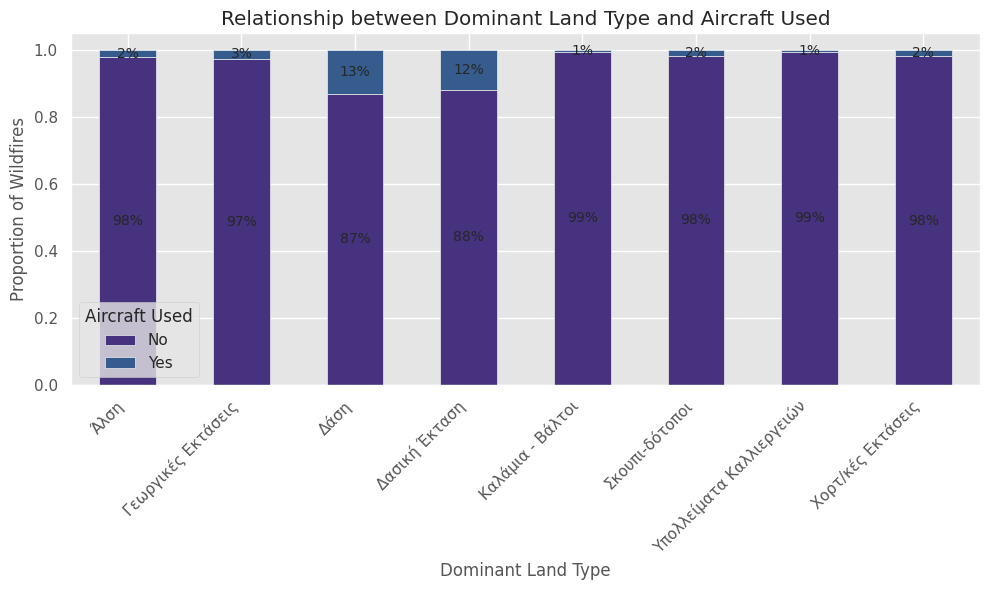

In [129]:
# Create a cross-tabulation (contingency table)
cross_tab = pd.crosstab(df['Dominant_Land_Type'], df['Aircraft_Used'], normalize='index')

# Create a stacked bar plot
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))  # Adjust figsize as needed

# Customize the plot
plt.title('Relationship between Dominant Land Type and Aircraft Used')
plt.xlabel('Dominant Land Type')
plt.ylabel('Proportion of Wildfires')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Aircraft Used', labels=['No', 'Yes'])

# Add percentage labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.0%}', ha='center', va='center')

plt.tight_layout()
plt.show()

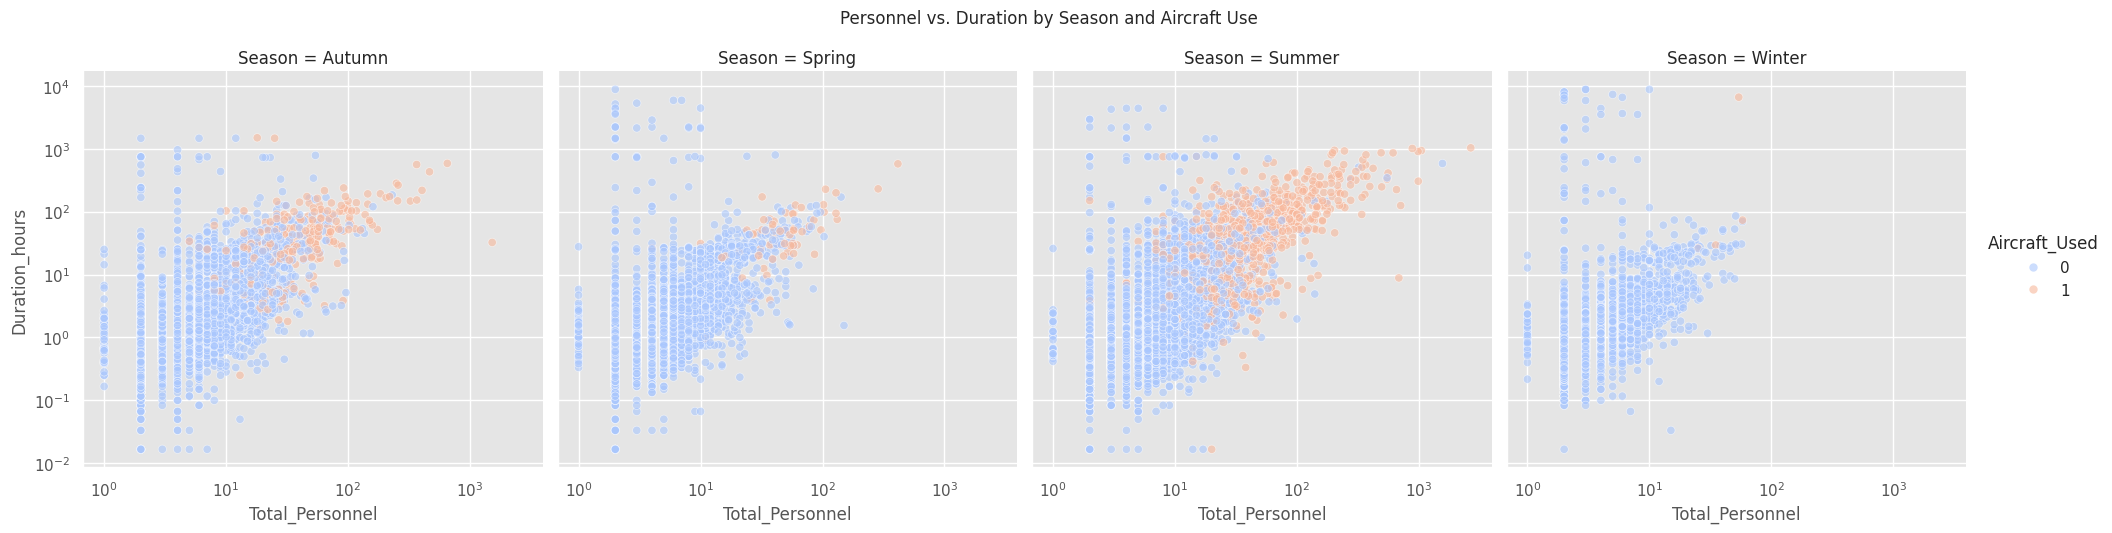

In [130]:
sns.relplot(
    data=df,
    x='Total_Personnel',
    y='Duration_hours',
    hue='Aircraft_Used',
    col='Season',
    alpha=0.6,
    palette='coolwarm',
    height=5
)
plt.xscale('log')  # If personnel data is skewed
plt.yscale('log')
plt.suptitle('Personnel vs. Duration by Season and Aircraft Use', y=1.05)
plt.show()

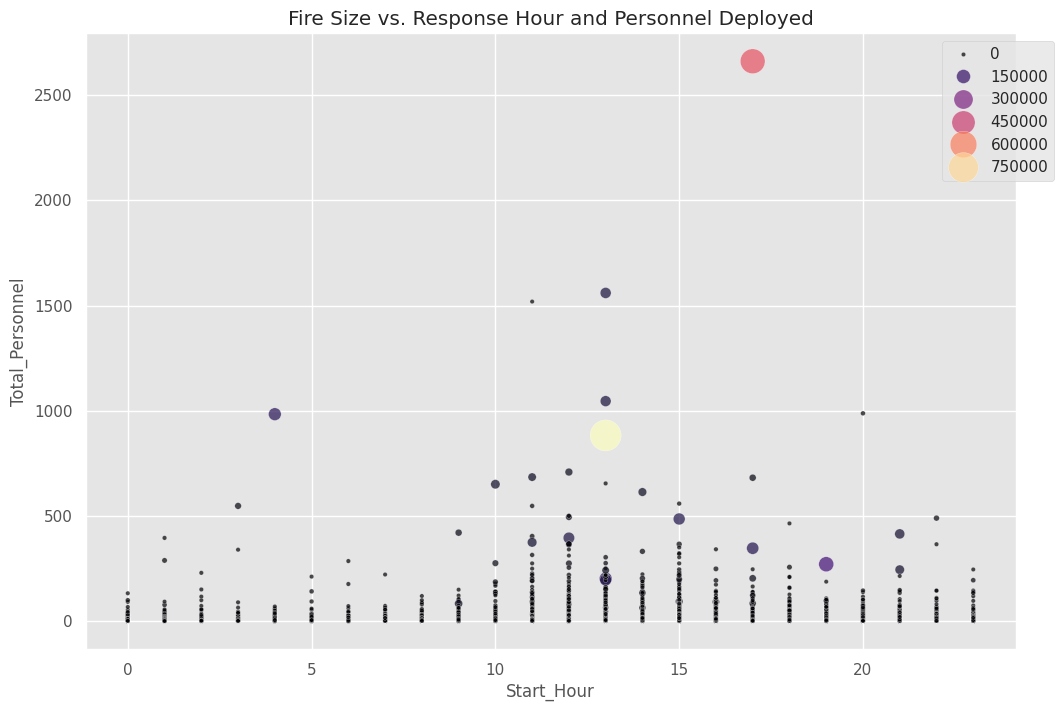

In [131]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Start_Hour',
    y='Total_Personnel',
    size='Total_Area_Impacted',
    hue='Total_Area_Impacted',
    sizes=(10, 500),
    palette='magma',
    alpha=0.7
)
plt.title('Fire Size vs. Response Hour and Personnel Deployed')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

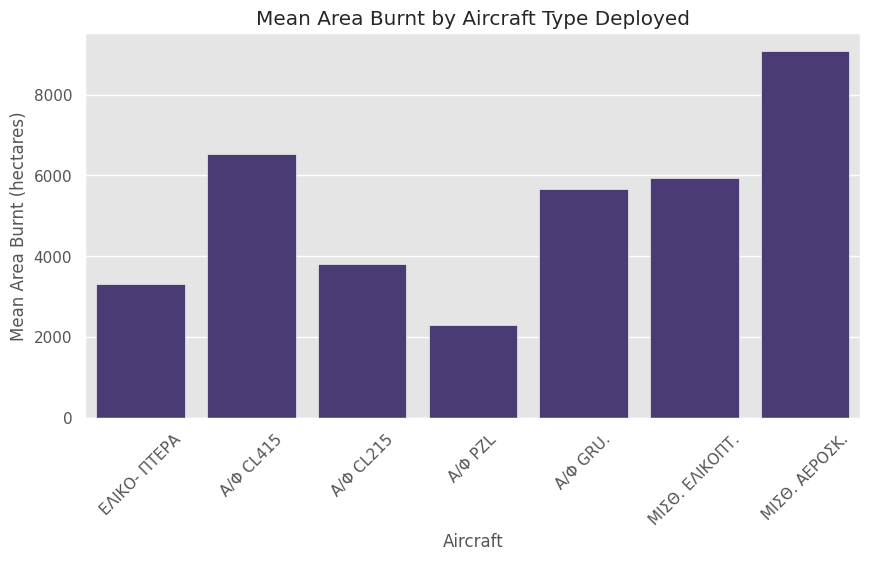

In [132]:
# Calculate mean area burnt when each aircraft was used
aircraft_cols = ['ΕΛΙΚΟ- ΠΤΕΡΑ', 'Α/Φ CL415', 'Α/Φ CL215', 'Α/Φ PZL', 'Α/Φ GRU.', 'ΜΙΣΘ. ΕΛΙΚΟΠΤ.', 'ΜΙΣΘ. ΑΕΡΟΣΚ.']
aircraft_impact = pd.DataFrame({
    'Aircraft': aircraft_cols,
    'Mean_Area_Burnt': [df[df[col] > 0]['Total_Area_Impacted'].mean() for col in aircraft_cols],
    'Std_Dev': [df[df[col] > 0]['Total_Area_Impacted'].std() for col in aircraft_cols]
})

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    x='Aircraft',
    y='Mean_Area_Burnt',
    data=aircraft_impact,
    capsize=0.1
)
plt.title('Mean Area Burnt by Aircraft Type Deployed')
plt.ylabel('Mean Area Burnt (hectares)')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

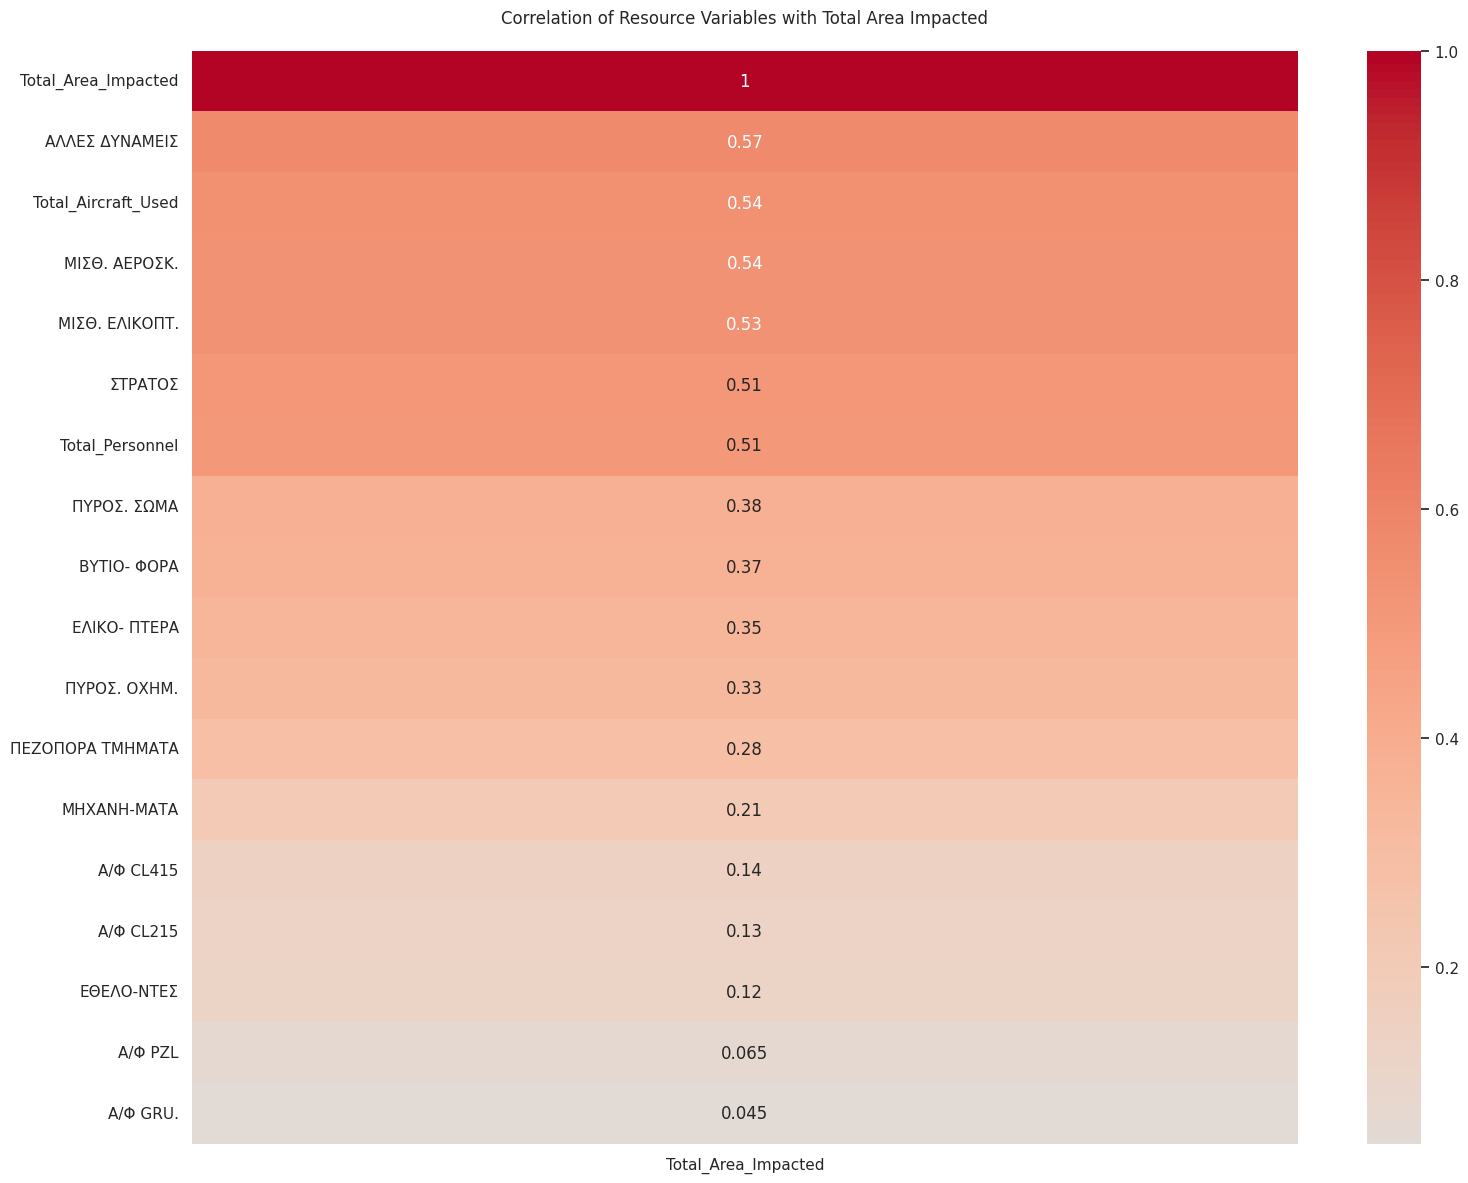

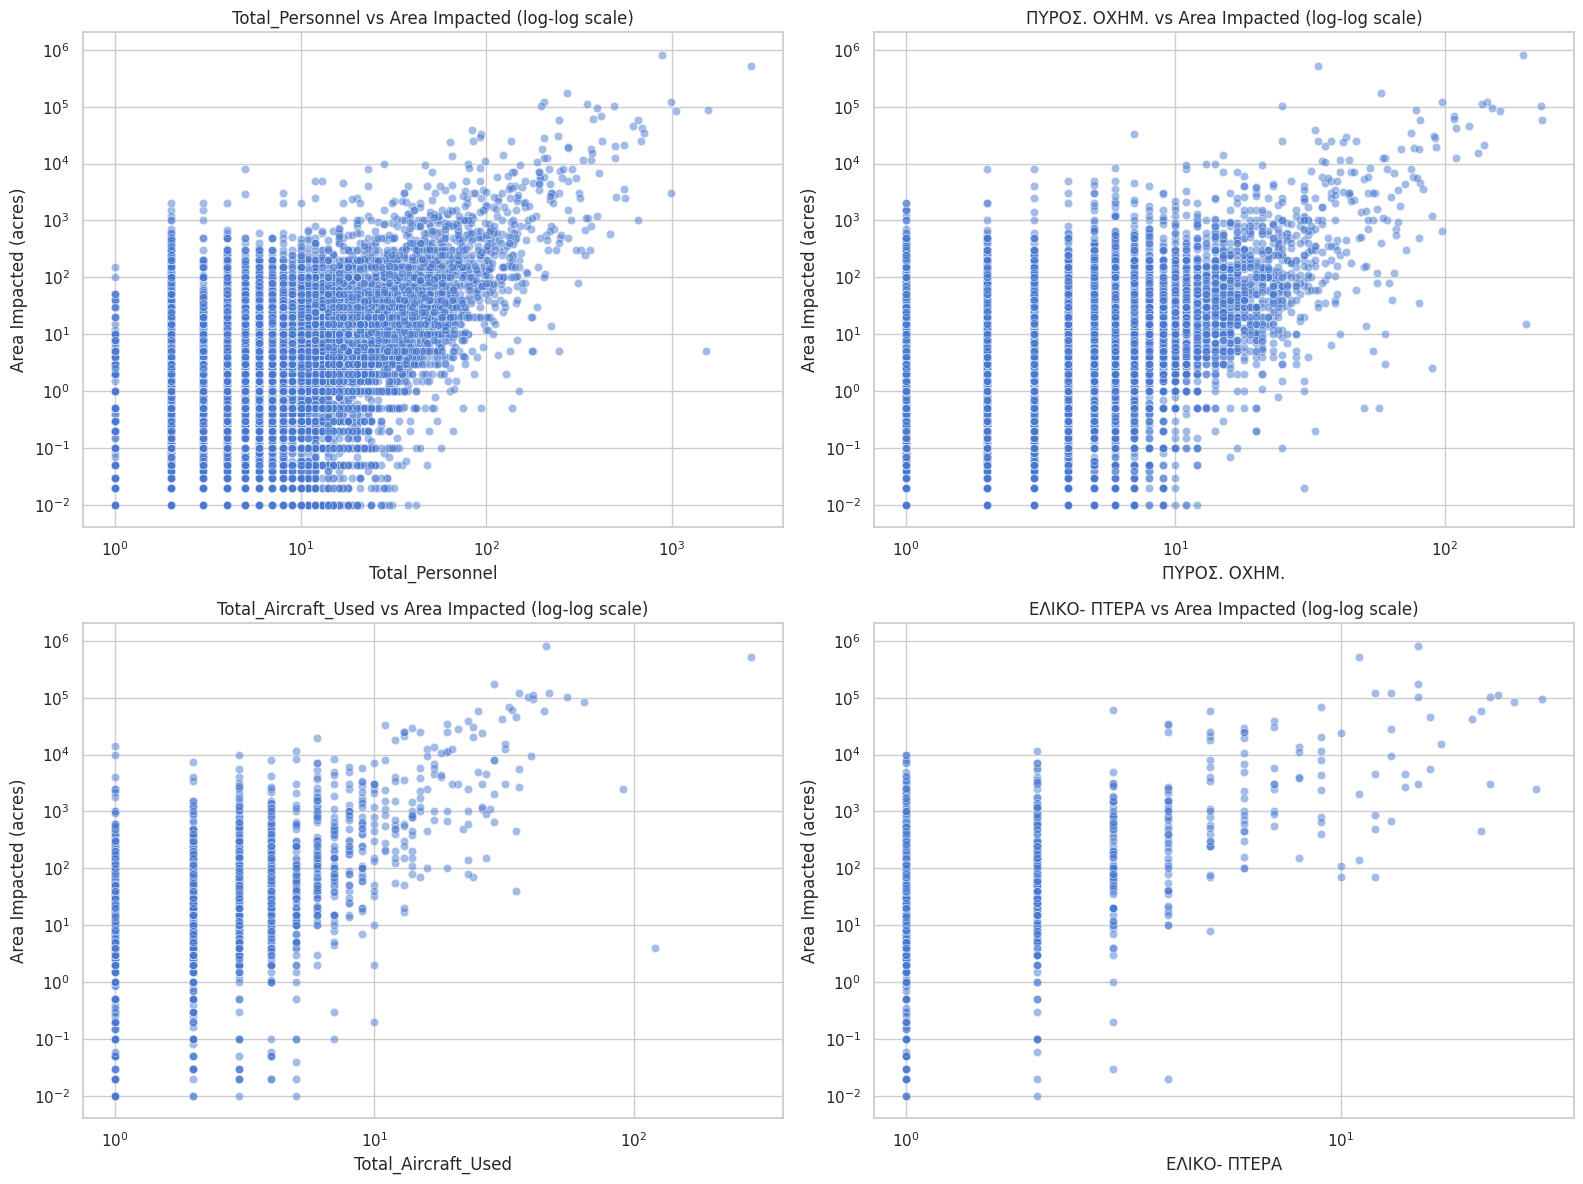

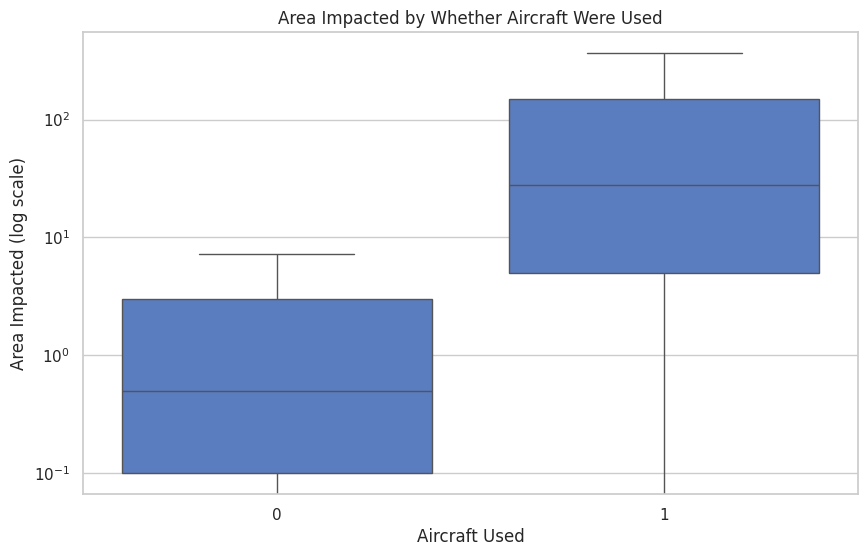

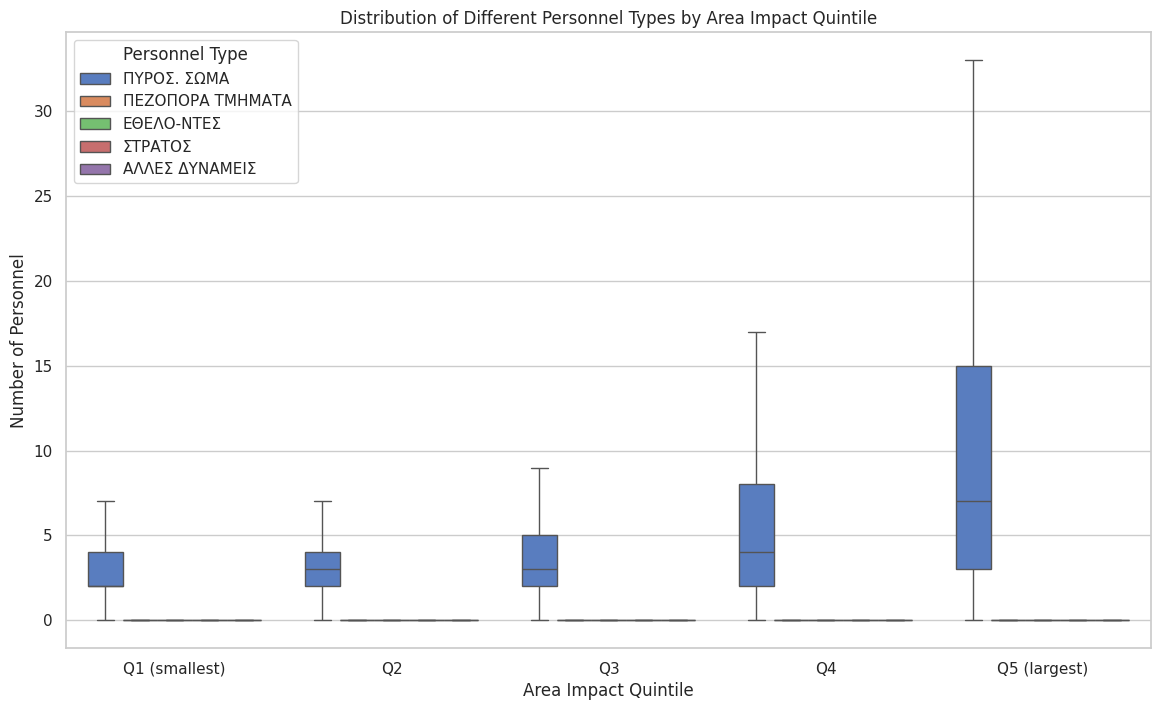

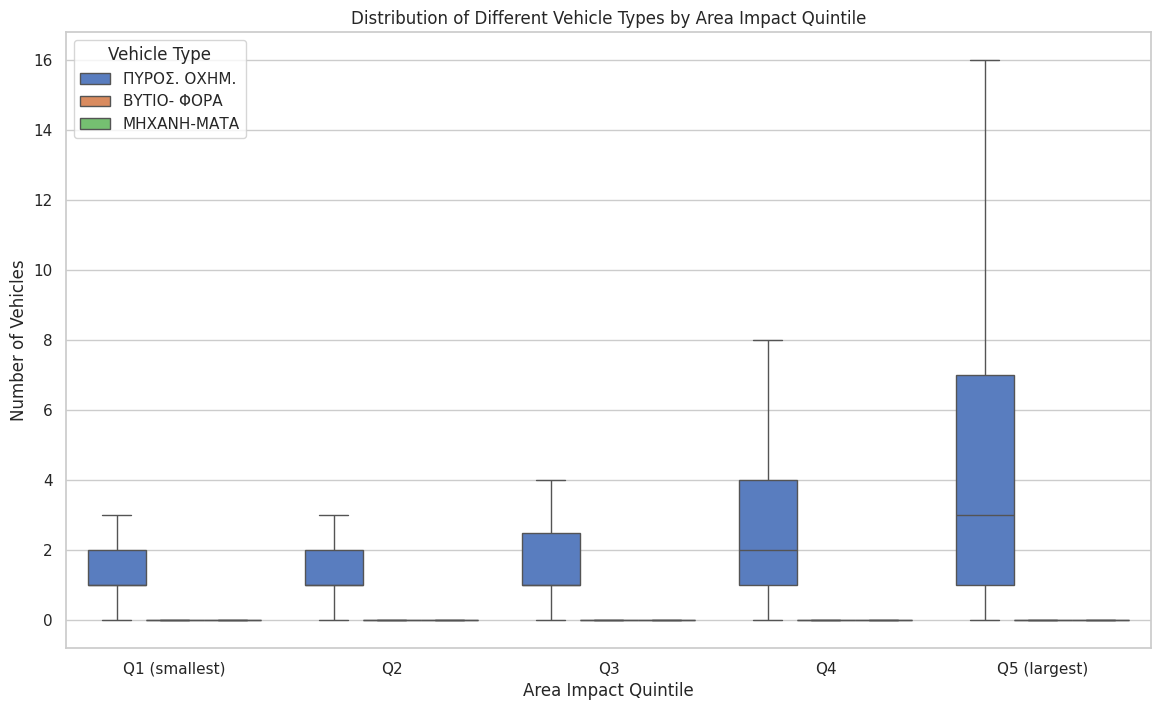

<Figure size 1200x600 with 0 Axes>

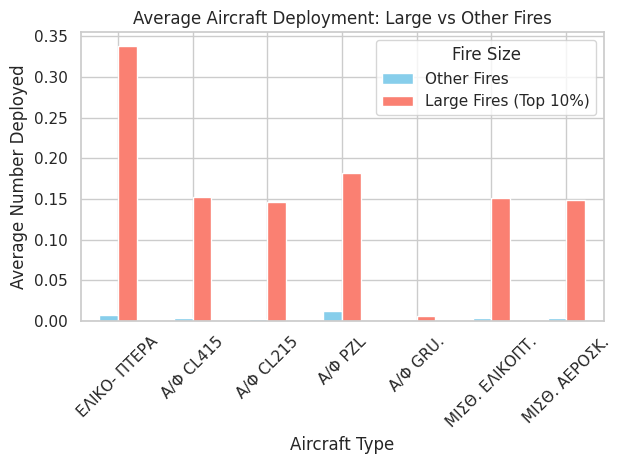

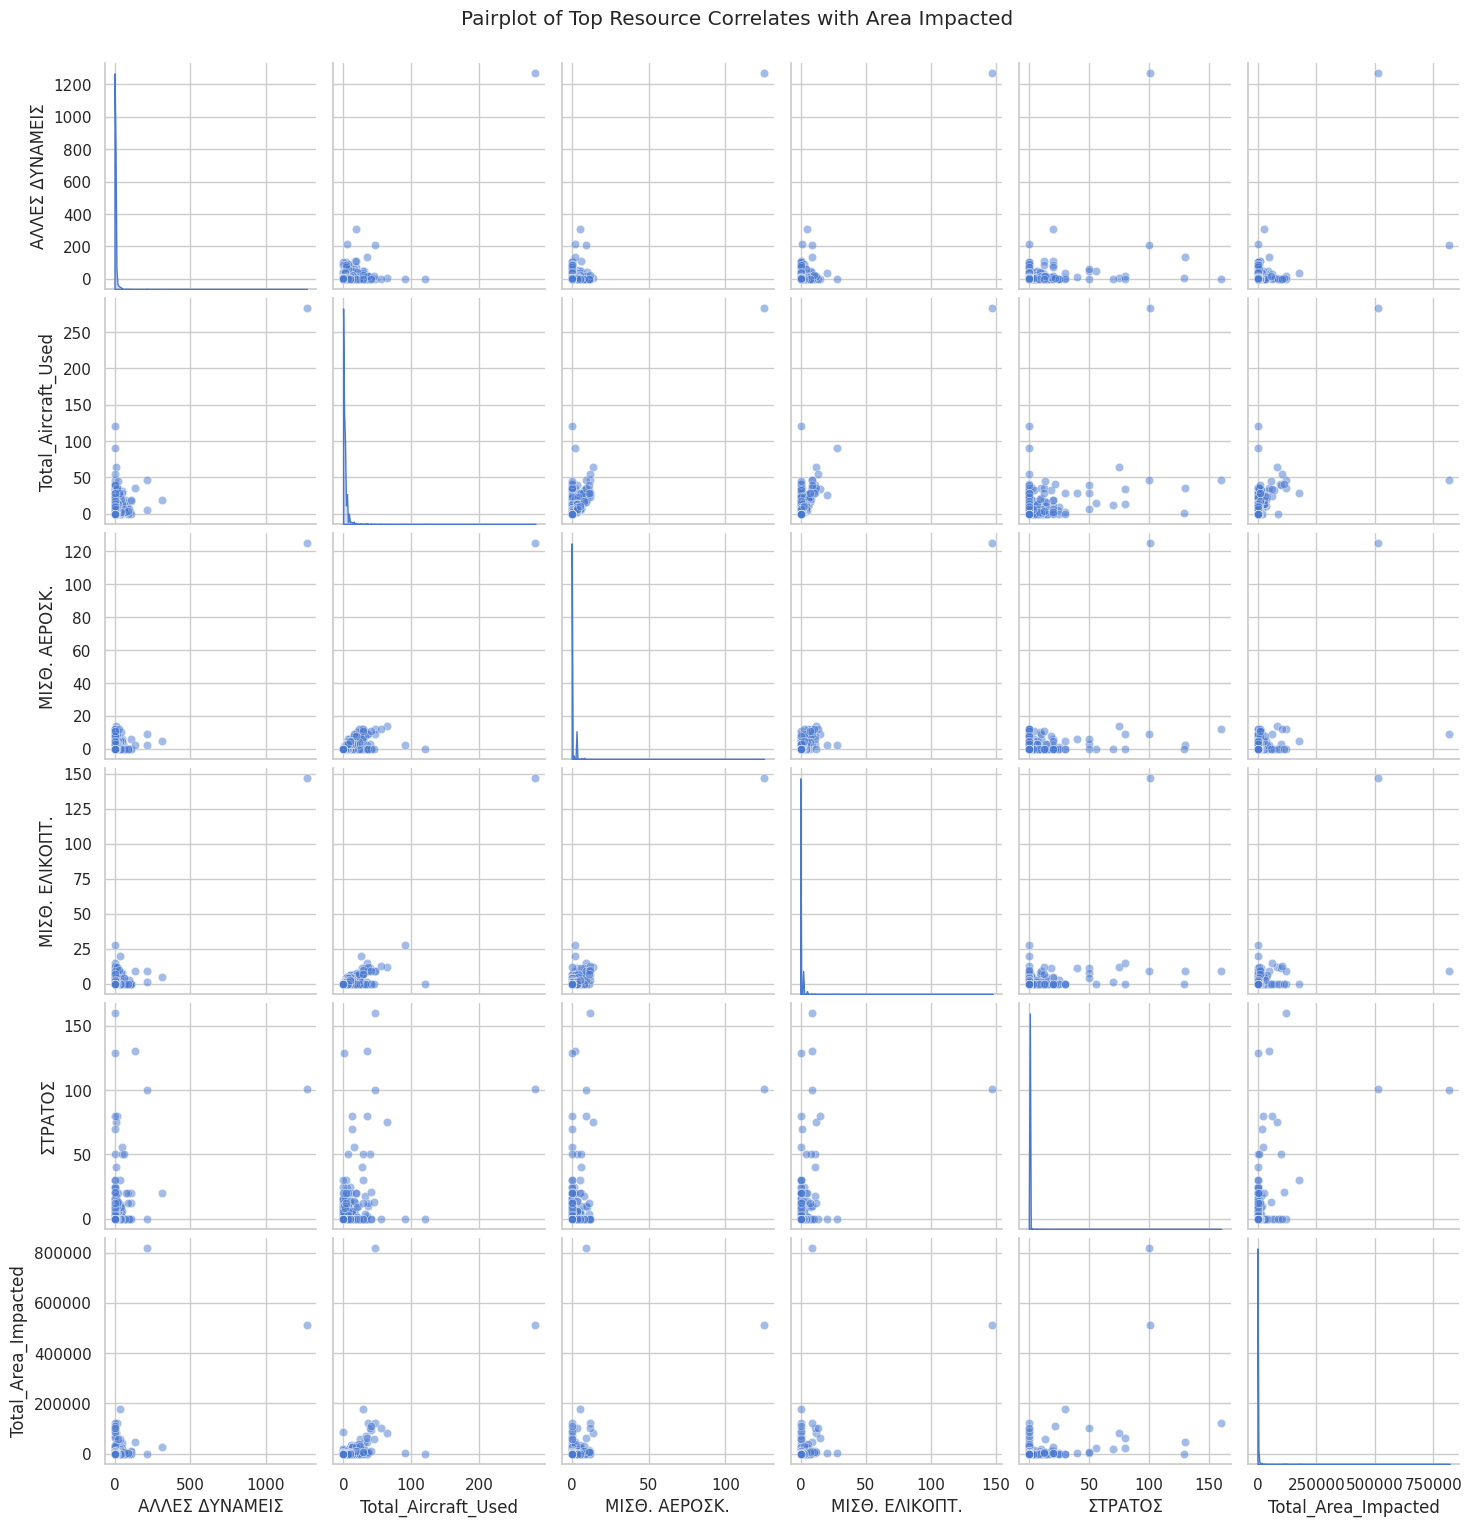

In [133]:
# Set up visualization style
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(12, 8))

## 1. Correlation Heatmap of Resource Variables with Area Impacted
resource_cols = ['ΠΥΡΟΣ. ΣΩΜΑ', 'ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ', 'ΕΘΕΛΟ-ΝΤΕΣ', 'ΣΤΡΑΤΟΣ',
                'ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ', 'ΠΥΡΟΣ. ΟΧΗΜ.', 'ΒΥΤΙΟ- ΦΟΡΑ', 'ΜΗΧΑΝΗ-ΜΑΤΑ',
                'ΕΛΙΚΟ- ΠΤΕΡΑ', 'Α/Φ CL415', 'Α/Φ CL215', 'Α/Φ PZL', 'Α/Φ GRU.',
                'ΜΙΣΘ. ΕΛΙΚΟΠΤ.', 'ΜΙΣΘ. ΑΕΡΟΣΚ.', 'Total_Personnel',
                'Total_Aircraft_Used', 'Total_Area_Impacted']

# Calculate correlations
corr_matrix = df[resource_cols].corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix[['Total_Area_Impacted']].sort_values(by='Total_Area_Impacted', ascending=False),
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Resource Variables with Total Area Impacted', pad=20)
plt.tight_layout()
plt.show()

## 2. Scatter Plots of Key Resources vs Area Impacted (log scale)
key_resources = ['Total_Personnel', 'ΠΥΡΟΣ. ΟΧΗΜ.', 'Total_Aircraft_Used', 'ΕΛΙΚΟ- ΠΤΕΡΑ']

plt.figure(figsize=(16, 12))
for i, col in enumerate(key_resources, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[col], y=df['Total_Area_Impacted'], alpha=0.5)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'{col} vs Area Impacted (log-log scale)')
    plt.xlabel(col)
    plt.ylabel('Area Impacted (acres)')
plt.tight_layout()
plt.show()

## 3. Boxplot of Area Impacted by Aircraft Usage
plt.figure(figsize=(10, 6))
sns.boxplot(x='Aircraft_Used', y='Total_Area_Impacted', data=df, showfliers=False)
plt.yscale('log')
plt.title('Area Impacted by Whether Aircraft Were Used')
plt.ylabel('Area Impacted (log scale)')
plt.xlabel('Aircraft Used')
plt.show()

## 4. Personnel Distribution by Area Impacted Quintiles
# Create area impact quintiles
df['Area_Quintile'] = pd.qcut(df['Total_Area_Impacted'], 5, labels=['Q1 (smallest)', 'Q2', 'Q3', 'Q4', 'Q5 (largest)'])

# Melt personnel columns
personnel_cols = ['ΠΥΡΟΣ. ΣΩΜΑ', 'ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ', 'ΕΘΕΛΟ-ΝΤΕΣ', 'ΣΤΡΑΤΟΣ', 'ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ']
personnel_melt = df.melt(id_vars=['Area_Quintile'], value_vars=personnel_cols,
                        var_name='Personnel_Type', value_name='Count')

plt.figure(figsize=(14, 8))
sns.boxplot(x='Area_Quintile', y='Count', hue='Personnel_Type', data=personnel_melt, showfliers=False)
plt.title('Distribution of Different Personnel Types by Area Impact Quintile')
plt.ylabel('Number of Personnel')
plt.xlabel('Area Impact Quintile')
plt.legend(title='Personnel Type')
plt.show()

## 5. Vehicle and Equipment Usage by Area Impact Quintile
vehicle_cols = ['ΠΥΡΟΣ. ΟΧΗΜ.', 'ΒΥΤΙΟ- ΦΟΡΑ', 'ΜΗΧΑΝΗ-ΜΑΤΑ']
vehicle_melt = df.melt(id_vars=['Area_Quintile'], value_vars=vehicle_cols,
                      var_name='Vehicle_Type', value_name='Count')

plt.figure(figsize=(14, 8))
sns.boxplot(x='Area_Quintile', y='Count', hue='Vehicle_Type', data=vehicle_melt, showfliers=False)
plt.title('Distribution of Different Vehicle Types by Area Impact Quintile')
plt.ylabel('Number of Vehicles')
plt.xlabel('Area Impact Quintile')
plt.legend(title='Vehicle Type')
plt.show()

## 6. Aircraft Usage Patterns for Large Fires
# Define large fires as top 10% by area
large_fire_threshold = df['Total_Area_Impacted'].quantile(0.9)
df['Large_Fire'] = df['Total_Area_Impacted'] >= large_fire_threshold

aircraft_cols = ['ΕΛΙΚΟ- ΠΤΕΡΑ', 'Α/Φ CL415', 'Α/Φ CL215', 'Α/Φ PZL', 'Α/Φ GRU.',
                'ΜΙΣΘ. ΕΛΙΚΟΠΤ.', 'ΜΙΣΘ. ΑΕΡΟΣΚ.']

# Calculate mean aircraft usage by fire size
aircraft_means = df.groupby('Large_Fire')[aircraft_cols].mean().T

# Plot comparison
plt.figure(figsize=(12, 6))
aircraft_means.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Aircraft Deployment: Large vs Other Fires')
plt.ylabel('Average Number Deployed')
plt.xlabel('Aircraft Type')
plt.xticks(rotation=45)
plt.legend(title='Fire Size', labels=['Other Fires', 'Large Fires (Top 10%)'])
plt.tight_layout()
plt.show()

## 7. Pairplot of Top Correlated Resources with Area Impacted
# Get top 5 most correlated resources
top_correlated = corr_matrix['Total_Area_Impacted'].sort_values(ascending=False).index[1:6]

sns.pairplot(df[list(top_correlated) + ['Total_Area_Impacted']],
             diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Top Resource Correlates with Area Impacted', y=1.02)
plt.show()